In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# -----------------------------------
# 1. Data Generation with Dynamic Yield Trends
# -----------------------------------
# Define districts in South Indian states
states_districts = {
    "Tamil Nadu": ["Ariyalur", "Chennai", "Coimbatore", "Cuddalore", "Dharmapuri", "Dindigul", "Erode", "Kallakurichi",
                   "Kancheepuram", "Kanyakumari", "Karur", "Krishnagiri", "Madurai", "Mayiladuthurai", "Nagapattinam",
                   "Namakkal", "Nilgiris", "Perambalur", "Pudukkottai", "Ramanathapuram", "Ranipet", "Salem", "Sivaganga",
                   "Tenkasi", "Thanjavur", "Theni", "Thoothukudi", "Tiruchirappalli", "Tirunelveli", "Tirupathur", "Tiruppur",
                   "Tiruvallur", "Tiruvannamalai", "Tiruvarur", "Vellore", "Viluppuram", "Virudhunagar", "Chengalpattu"],
    "Karnataka": ["Bagalkot", "Ballari", "Belagavi", "Bengaluru Rural", "Bengaluru Urban", "Bidar", "Chamarajanagar",
                  "Chikkaballapura", "Chikkamagaluru", "Chitradurga", "Dakshina Kannada", "Davangere", "Dharwad", "Gadag",
                  "Hassan", "Haveri", "Kalaburagi", "Kodagu", "Kolar", "Koppal", "Mandya", "Mysuru", "Raichur", "Ramanagara",
                  "Shivamogga", "Tumakuru", "Udupi", "Uttara Kannada", "Vijayanagara", "Vijayapura", "Yadgir"],
    "Andhra Pradesh": ["Alluri Sitharama Raju", "Anakapalli", "Anantapur", "Annamayya", "Bapatla", "Chittoor", "East Godavari",
                       "Eluru", "Guntur", "Kadapa", "Kakinada", "Konaseema", "Krishna", "Kurnool", "Nandyal", "Nellore", "Palnadu",
                       "Parvathipuram Manyam", "Prakasam", "Sri Balaji", "Sri Sathya Sai", "Srikakulam", "Tirupati", "Visakhapatnam",
                       "Vizianagaram", "West Godavari"],
    "Telangana": ["Adilabad", "Bhadradri Kothagudem", "Hyderabad", "Jagtial", "Jangaon", "Jayashankar Bhupalpally", "Jogulamba Gadwal",
                  "Kamareddy", "Karimnagar", "Khammam", "Kumuram Bheem Asifabad", "Mahabubabad", "Mahbubnagar", "Mancherial",
                  "Medak", "Medchal-Malkajgiri", "Mulugu", "Nagarkurnool", "Nalgonda", "Narayanpet", "Nirmal", "Nizamabad",
                  "Peddapalli", "Rajanna Sircilla", "Rangareddy", "Sangareddy", "Siddipet", "Suryapet", "Vikarabad", "Wanaparthy",
                  "Warangal", "Hanumakonda", "Yadadri Bhuvanagiri"],
    "Kerala": ["Alappuzha", "Ernakulam", "Idukki", "Kannur", "Kasaragod", "Kollam", "Kottayam", "Kozhikode", "Malappuram",
               "Palakkad", "Pathanamthitta", "Thiruvananthapuram", "Thrissur", "Wayanad"]
}

# Define crops and harvest months
crops = ["Rice", "Groundnut", "Sugarcane", "Ragi", "Cotton"]
harvest_months = {"Rice": ["Oct"], "Groundnut": ["Nov"], "Sugarcane": ["Jan"], "Ragi": ["Dec"], "Cotton": ["Feb"]}

# Define soil types by district
soil_types_by_state = {"Tamil Nadu": "Red", "Karnataka": "Black", "Andhra Pradesh": "Alluvial", "Telangana": "Red", "Kerala": "Laterite"}
soil_types = {}
for state, districts in states_districts.items():
    base_soil = soil_types_by_state[state]
    for district in districts:
        if state == "Tamil Nadu" and district in ["Thanjavur", "Nagapattinam", "Tiruvarur", "Cuddalore", "Mayiladuthurai"]:
            soil_types[district] = "Alluvial"
        elif state == "Andhra Pradesh" and district in ["East Godavari", "West Godavari", "Krishna", "Guntur", "Bapatla"]:
            soil_types[district] = "Alluvial"
        elif state == "Kerala" or (state == "Karnataka" and district in ["Udupi", "Dakshina Kannada", "Uttara Kannada", "Kodagu"]):
            soil_types[district] = "Laterite"
        elif state == "Karnataka" or (state == "Telangana" and district in ["Adilabad", "Nizamabad", "Karimnagar", "Warangal"]):
            soil_types[district] = "Black"
        elif state == "Andhra Pradesh" and district in ["Anantapur", "Chittoor", "Kadapa", "Kurnool"]:
            soil_types[district] = "Red"
        else:
            soil_types[district] = base_soil

# Crop-soil compatibility
crop_soil_compatibility = {
    "Rice": ["Alluvial", "Clayey"],
    "Groundnut": ["Red", "Sandy Loam"],
    "Sugarcane": ["Alluvial", "Black"],
    "Ragi": ["Red", "Laterite"],
    "Cotton": ["Black", "Red"]
}

# Soil pH and NPK ranges
soil_ph_ranges = {"Alluvial": (6.0, 7.5), "Clayey": (5.8, 7.0), "Red": (5.5, 6.5), "Black": (6.5, 7.8), "Laterite": (5.0, 6.0), "Sandy Loam": (5.5, 6.8)}
npk_base_ranges = {
    "Rice": {"Alluvial": {"N": 120, "P": 30, "K": 200}, "Clayey": {"N": 110, "P": 28, "K": 180}},
    "Groundnut": {"Red": {"N": 50, "P": 40, "K": 120}, "Sandy Loam": {"N": 45, "P": 35, "K": 110}},
    "Sugarcane": {"Alluvial": {"N": 150, "P": 40, "K": 250}, "Black": {"N": 140, "P": 35, "K": 220}},
    "Ragi": {"Red": {"N": 60, "P": 20, "K": 130}, "Laterite": {"N": 55, "P": 18, "K": 120}},
    "Cotton": {"Black": {"N": 80, "P": 40, "K": 150}, "Red": {"N": 70, "P": 35, "K": 140}}
}

# Climate ranges
climate_base_ranges = {
    "Tamil Nadu": {"Temp": (28.0, 32.0), "Rain": (700, 1000), "Hum": (65, 75)},
    "Karnataka": {"Temp": (25.0, 30.0), "Rain": (500, 800), "Hum": (55, 65)},
    "Andhra Pradesh": {"Temp": (29.0, 33.0), "Rain": (600, 900), "Hum": (70, 80)},
    "Telangana": {"Temp": (27.0, 32.0), "Rain": (600, 800), "Hum": (60, 70)},
    "Kerala": {"Temp": (27.0, 30.0), "Rain": (1000, 1500), "Hum": (75, 85)}
}

# Yield ranges
yield_base_ranges = {
    "Rice": {"Alluvial": (4.0, 5.5), "Clayey": (3.5, 5.0)},
    "Groundnut": {"Red": (0.8, 1.4), "Sandy Loam": (0.6, 1.2)},
    "Sugarcane": {"Alluvial": (65, 85), "Black": (60, 80)},
    "Ragi": {"Red": (1.2, 1.8), "Laterite": (1.0, 1.6)},
    "Cotton": {"Black": (1.3, 2.3), "Red": (1.0, 1.8)}
}

# Price ranges
price_base_ranges_2000 = {
    "Rice": (1800, 2200),
    "Groundnut": (2300, 2700),
    "Sugarcane": (1200, 1600),
    "Ragi": (1200, 1500),
    "Cotton": (2800, 3200)
}

# Function to introduce 0.5-1.5% null values
def introduce_nulls(df, columns, null_rate_min=0.005, null_rate_max=0.015):
    for col in columns:
        null_rate = np.random.uniform(null_rate_min, null_rate_max)
        mask = np.random.random(df.shape[0]) < null_rate
        df.loc[mask, col] = np.nan
    return df

# Function to adjust yields with dynamic trends
def adjust_yield(crop, year, base_yield, district):
    drought_years = [2002, 2003, 2012, 2016, 2017]
    recovery_years = [2004, 2013, 2018]

    # Crop-specific growth rates and sensitivities
    growth_rates = {
        "Rice": 1.01 + np.random.uniform(-0.002, 0.002),
        "Groundnut": 1.015 + np.random.uniform(-0.003, 0.003),
        "Sugarcane": 1.012 + np.random.uniform(-0.0025, 0.0025),
        "Ragi": 1.018 + np.random.uniform(-0.004, 0.004),
        "Cotton": 1.02 + np.random.uniform(-0.0035, 0.0035),
    }

    # Crop-specific drought sensitivity
    drought_factors = {
        "Rice": 0.88,
        "Groundnut": 0.75,
        "Sugarcane": 0.92,
        "Ragi": 0.80,
        "Cotton": 0.82,
    }
    recovery_factors = {
        "Rice": 1.05,
        "Groundnut": 1.12,
        "Sugarcane": 1.03,
        "Ragi": 1.09,
        "Cotton": 1.07,
    }

    growth_rate = growth_rates[crop]
    years_since_2000 = year - 2000
    adjusted_yield = base_yield * (growth_rate ** years_since_2000)

    # Apply drought and recovery
    if year in drought_years:
        adjusted_yield *= drought_factors[crop]
    elif year in recovery_years:
        adjusted_yield *= recovery_factors[crop]

    # District-specific adjustments
    if district in ["Chennai", "Bengaluru Urban", "Hyderabad"]:
        adjusted_yield *= 0.9
    elif district in ["Thanjavur", "Nagapattinam", "Tiruvarur", "East Godavari", "West Godavari", "Krishna", "Guntur", "Bapatla"]:
        if crop == "Rice":
            adjusted_yield *= 1.10
    elif district in ["Kurnool", "Kadapa", "Anantapur", "Chittoor"]:
        if crop == "Groundnut":
            adjusted_yield *= 1.15
    elif district in ["Coimbatore", "Erode"]:
        if crop == "Cotton":
            adjusted_yield *= 1.1

    # Add year-to-year variability with crop-specific scaling
    crop_variability = {
        "Rice": 0.06,
        "Groundnut": 0.10,
        "Sugarcane": 0.05,
        "Ragi": 0.09,
        "Cotton": 0.08,
    }
    adjusted_yield *= (1 + np.random.normal(0, crop_variability[crop]))

    return adjusted_yield

# Generate ICRISAT data with dynamic trends
icrisat_data = []
for year in range(2000, 2025):
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    area = np.random.randint(20, 100)
                    yield_range = yield_base_ranges[crop][soil_type]
                    base_yield = np.random.uniform(yield_range[0], yield_range[1])
                    yield_t_ha = adjust_yield(crop, year, base_yield, district)
                    production = round(area * yield_t_ha, 0)
                    icrisat_data.append([state, district, crop, year, month, area, yield_t_ha, production])

icrisat_df = pd.DataFrame(icrisat_data, columns=["State", "District", "Crop", "Year", "Month", "Area_ha", "Yield_t_ha", "Production_t"])
icrisat_df = introduce_nulls(icrisat_df, ["Yield_t_ha", "Production_t"])
icrisat_df.to_csv("icrisat_data_south_india.csv", index=False)

# Generate NASA POWER data
nasa_data = []
for year in range(2000, 2025):
    climate_adjust = {
        state: {
            "Temp": (base["Temp"][0] + (year - 2000) * 0.02, base["Temp"][1] + (year - 2000) * 0.02),
            "Rain": (base["Rain"][0] * (1 - (year - 2000) * 0.0015), base["Rain"][1] * (1 - (year - 2000) * 0.0015)),
            "Hum": (base["Hum"][0] + (year - 2000) * 0.008, base["Hum"][1] + (year - 2000) * 0.008)
        }
        for state, base in climate_base_ranges.items()
    }
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    climate = climate_adjust[state]
                    temp = np.random.uniform(climate["Temp"][0], climate["Temp"][1]) + np.random.normal(0, 0.1)
                    rain = np.random.uniform(climate["Rain"][0], climate["Rain"][1]) + np.random.normal(0, 6)
                    hum = np.random.uniform(climate["Hum"][0], climate["Hum"][1]) + np.random.normal(0, 0.5)
                    nasa_data.append([state, district, crop, year, month, round(temp, 1), round(rain, 0), round(hum, 0)])

nasa_df = pd.DataFrame(nasa_data, columns=["State", "District", "Crop", "Year", "Month", "Temperature_C", "Rainfall_mm", "Humidity_percent"])
nasa_df = introduce_nulls(nasa_df, ["Temperature_C", "Rainfall_mm", "Humidity_percent"])
nasa_df.to_csv("nasa_power_data_south_india.csv", index=False)

# Generate Soil data with low NPK correlation and realistic ranges
soil_data = []
for year in range(2000, 2025):
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                ph_range = soil_ph_ranges.get(soil_type, (5.5, 7.0))
                npk_base = npk_base_ranges[crop].get(soil_type, {"N": 80, "P": 30, "K": 150})
                soil_ph = np.random.uniform(ph_range[0], ph_range[1]) + np.random.normal(0, 0.08)
                nitrogen = np.random.normal(npk_base["N"], 7) + np.random.uniform(-12, 12)
                phosphorus = np.random.normal(npk_base["P"], 4) + np.random.uniform(-6, 6)
                potassium = np.random.normal(npk_base["K"], 10) + np.random.uniform(-18, 18)
                nitrogen = np.clip(nitrogen, npk_base["N"] * 0.7, npk_base["N"] * 1.3)
                phosphorus = np.clip(phosphorus, npk_base["P"] * 0.6, npk_base["P"] * 1.4)
                potassium = np.clip(potassium, npk_base["K"] * 0.75, npk_base["K"] * 1.25)
                soil_data.append([state, district, crop, year, soil_type, round(soil_ph, 1), round(nitrogen, 0), round(phosphorus, 0), round(potassium, 0)])

soil_df = pd.DataFrame(soil_data, columns=["State", "District", "Crop", "Year", "Soil_Type", "Soil_pH", "Nitrogen_mg_kg", "Phosphorus_mg_kg", "Potassium_mg_kg"])
soil_df = introduce_nulls(soil_df, ["Soil_pH", "Nitrogen_mg_kg", "Phosphorus_mg_kg", "Potassium_mg_kg"])
soil_df.to_csv("soil_data_south_india.csv", index=False)

# Generate AGMARKNET data
agmarknet_data = []
for year in range(2000, 2025):
    price_adjust = {crop: (base[0] * (1 + (year - 2000) * 0.03), base[1] * (1 + (year - 2000) * 0.03))
                    for crop, base in price_base_ranges_2000.items()}
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    price_range = price_adjust[crop]
                    price = np.random.uniform(price_range[0], price_range[1]) + np.random.normal(0, 12)
                    agmarknet_data.append([state, district, crop, year, month, round(price, 0)])

agmarknet_df = pd.DataFrame(agmarknet_data, columns=["State", "District", "Crop", "Year", "Month", "Market_Price_INR_quintal"])
agmarknet_df = introduce_nulls(agmarknet_df, ["Market_Price_INR_quintal"])
agmarknet_df.to_csv("agmarknet_data_south_india.csv", index=False)

In [ ]:
# -----------------------------------
# 2. Merge Datasets
# -----------------------------------
merged_df = pd.merge(icrisat_df, agmarknet_df, on=["State", "District", "Year", "Month", "Crop"], how="inner")
merged_df = pd.merge(merged_df, nasa_df, on=["State", "District", "Year", "Month"], how="inner")
merged_df = pd.merge(merged_df, soil_df, on=["State", "District", "Year"], how="inner")

merged_df = merged_df.sort_values(by=["State", "District", "Year", "Month", "Crop"])
columns = [
    "State", "District", "Year", "Month", "Crop",
    "Area_ha", "Yield_t_ha", "Production_t",
    "Temperature_C", "Rainfall_mm", "Humidity_percent",
    "Soil_Type", "Soil_pH", "Nitrogen_mg_kg", "Phosphorus_mg_kg", "Potassium_mg_kg",
    "Market_Price_INR_quintal"
]
merged_df = merged_df[columns]

if merged_df.duplicated().sum() > 0:
    print(f"Warning: Found {merged_df.duplicated().sum()} duplicate rows. Dropping duplicates.")
    merged_df = merged_df.drop_duplicates()

print(f"Merged dataset created with {len(merged_df)} rows")

Merged dataset created with 21100 rows


In [ ]:
# -----------------------------------
# 3. Check and Handle Null Values
# -----------------------------------
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
print("\nNull value counts before handling:")
print(merged_df.isnull().sum())

for column in numerical_columns:
    median_value = merged_df[column].median()
    merged_df[column] = merged_df[column].fillna(median_value)

print("\nNull value counts after filling:")
print(merged_df.isnull().sum())


Null value counts before handling:
State                         0
District                      0
Year                          0
Month                         0
Crop                          0
Area_ha                       0
Yield_t_ha                  190
Production_t                150
Temperature_C               163
Rainfall_mm                 227
Humidity_percent            241
Soil_Type                     0
Soil_pH                     153
Nitrogen_mg_kg              204
Phosphorus_mg_kg            260
Potassium_mg_kg             295
Market_Price_INR_quintal    285
dtype: int64

Null value counts after filling:
State                       0
District                    0
Year                        0
Month                       0
Crop                        0
Area_ha                     0
Yield_t_ha                  0
Production_t                0
Temperature_C               0
Rainfall_mm                 0
Humidity_percent            0
Soil_Type                   0
Soil_pH      

In [ ]:
def is_median_an_outlier(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    median_val = df[column].median()
    return median_val < lower_bound or median_val > upper_bound

for col in numerical_columns:
    if is_median_an_outlier(merged_df, col):
        print(f"⚠️ Median of '{col}' is an outlier.")
    else:
        print(f"✅ Median of '{col}' is NOT an outlier.")


✅ Median of 'Year' is NOT an outlier.
✅ Median of 'Area_ha' is NOT an outlier.
✅ Median of 'Yield_t_ha' is NOT an outlier.
✅ Median of 'Production_t' is NOT an outlier.
✅ Median of 'Temperature_C' is NOT an outlier.
✅ Median of 'Rainfall_mm' is NOT an outlier.
✅ Median of 'Humidity_percent' is NOT an outlier.
✅ Median of 'Soil_pH' is NOT an outlier.
✅ Median of 'Nitrogen_mg_kg' is NOT an outlier.
✅ Median of 'Phosphorus_mg_kg' is NOT an outlier.
✅ Median of 'Potassium_mg_kg' is NOT an outlier.
✅ Median of 'Market_Price_INR_quintal' is NOT an outlier.


Year: 0 outliers replaced with median = 2012.0
Area_ha: 0 outliers replaced with median = 59.0
Yield_t_ha: 4108 outliers replaced with median = 1.7993490178042417
Production_t: 3446 outliers replaced with median = 110.0
Temperature_C: 2 outliers replaced with median = 30.0
Rainfall_mm: 316 outliers replaced with median = 738.0
Humidity_percent: 25 outliers replaced with median = 68.0
Soil_pH: 614 outliers replaced with median = 6.2
Nitrogen_mg_kg: 3140 outliers replaced with median = 66.0
Phosphorus_mg_kg: 0 outliers replaced with median = 34.0
Potassium_mg_kg: 2760 outliers replaced with median = 138.0
Market_Price_INR_quintal: 0 outliers replaced with median = 2935.0


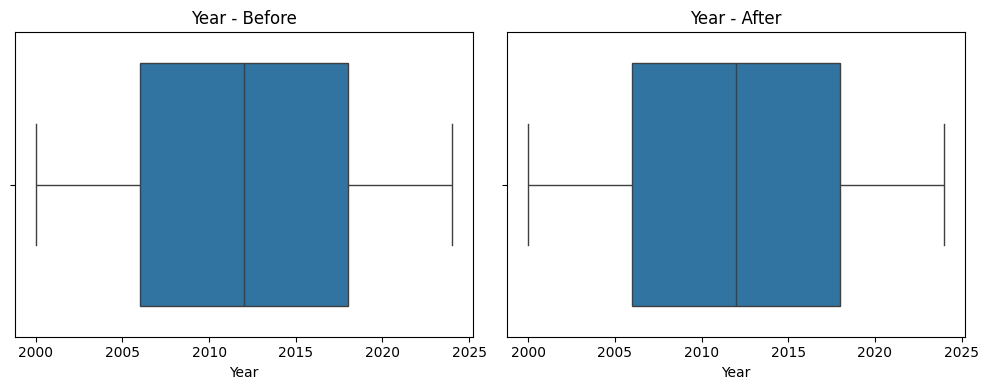

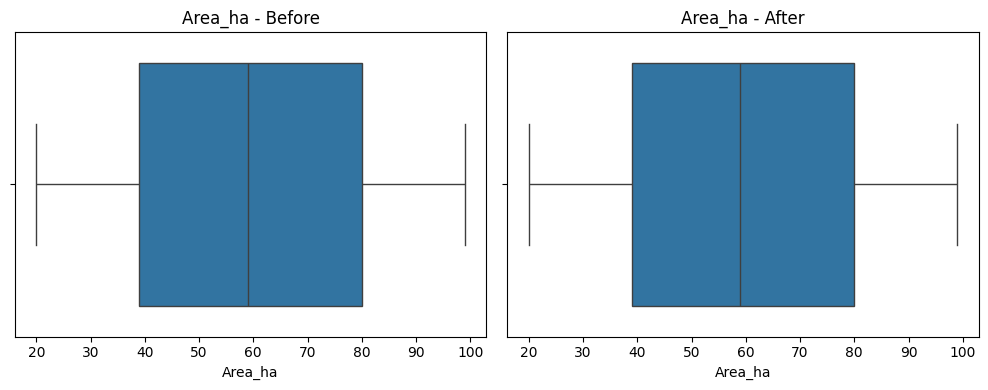

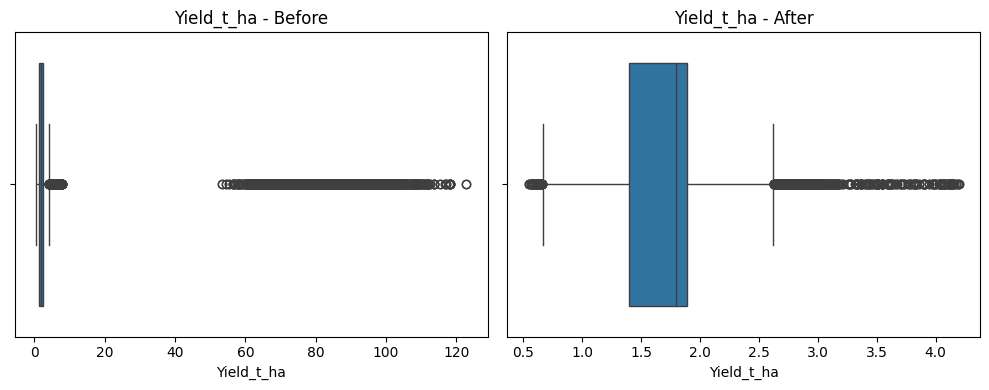

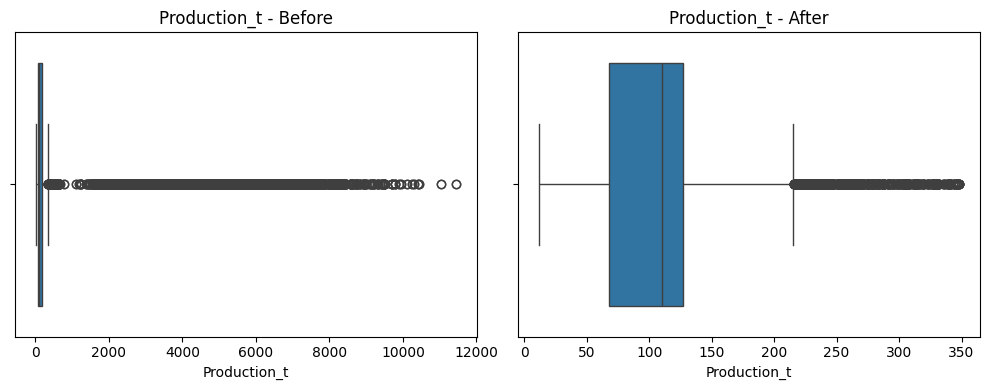

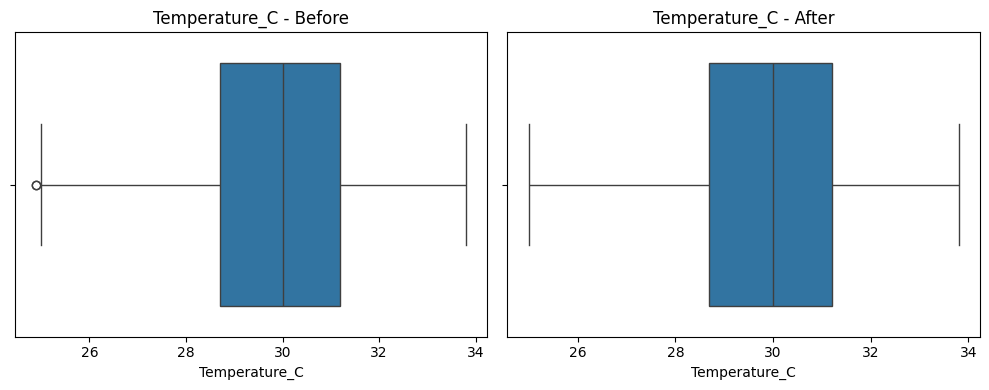

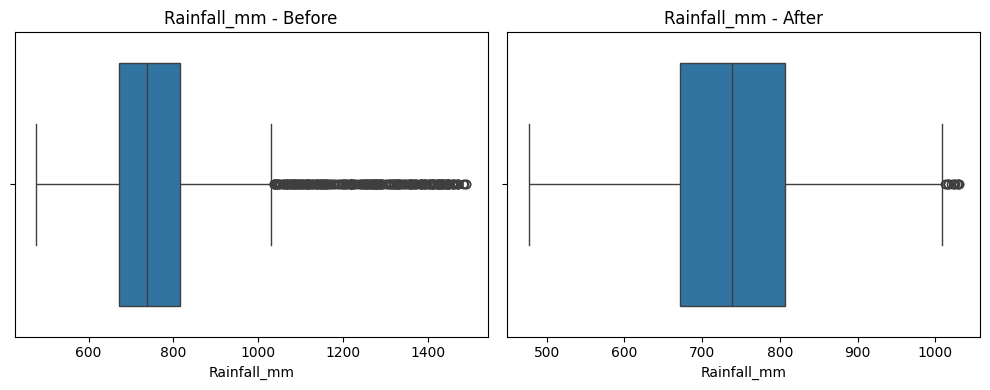

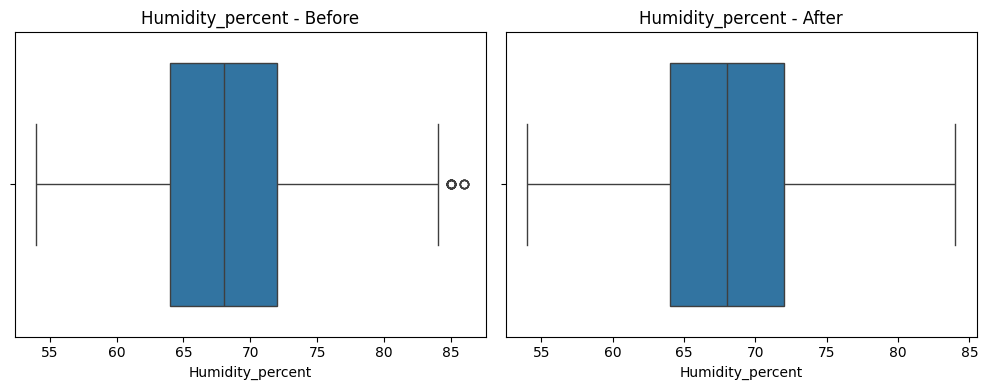

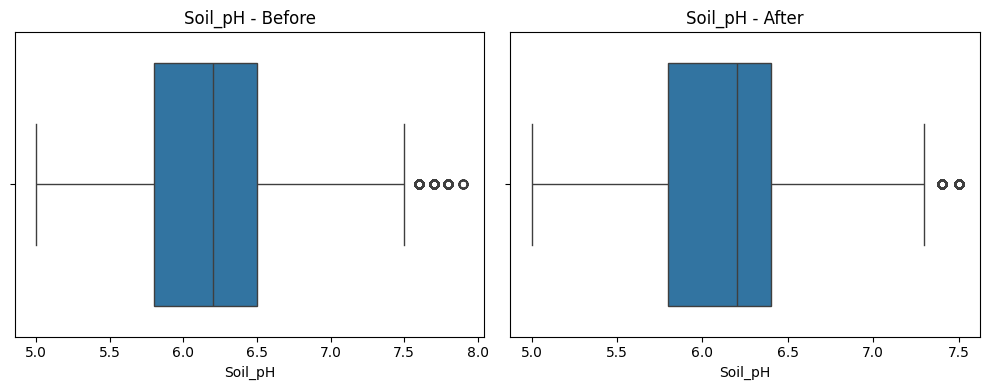

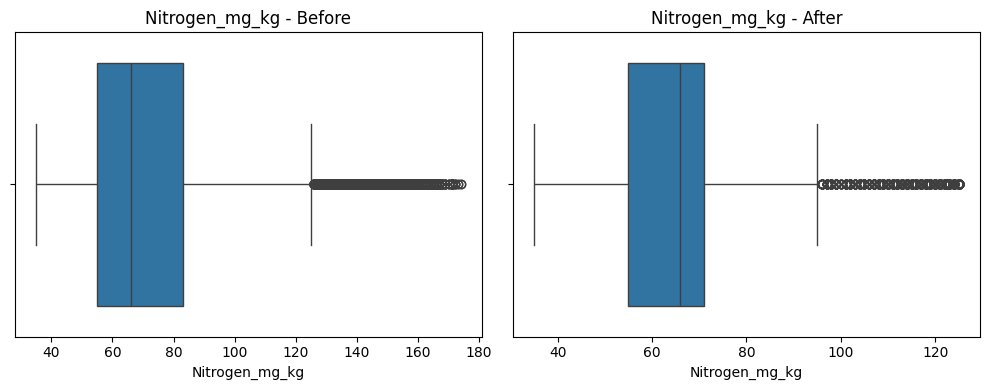

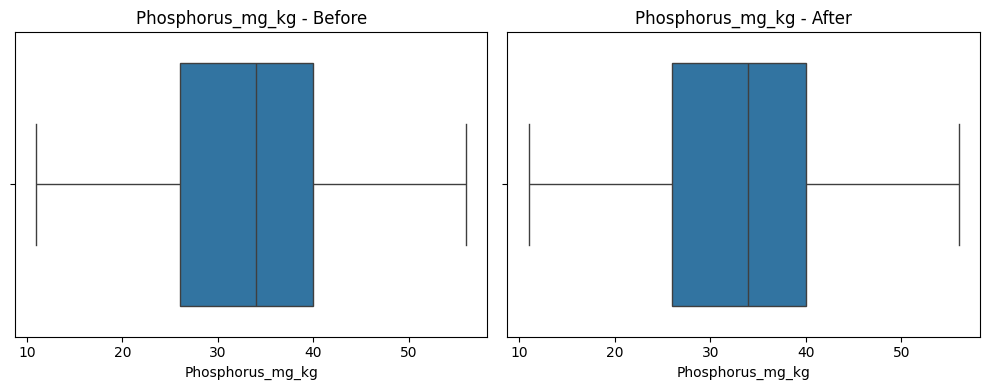

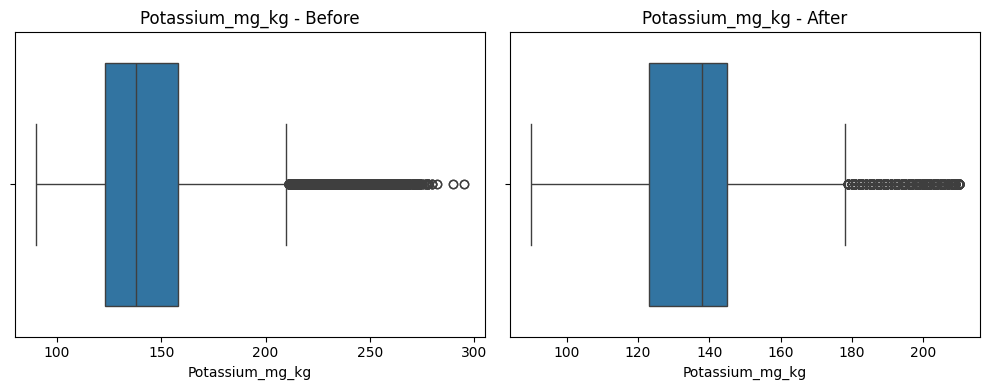

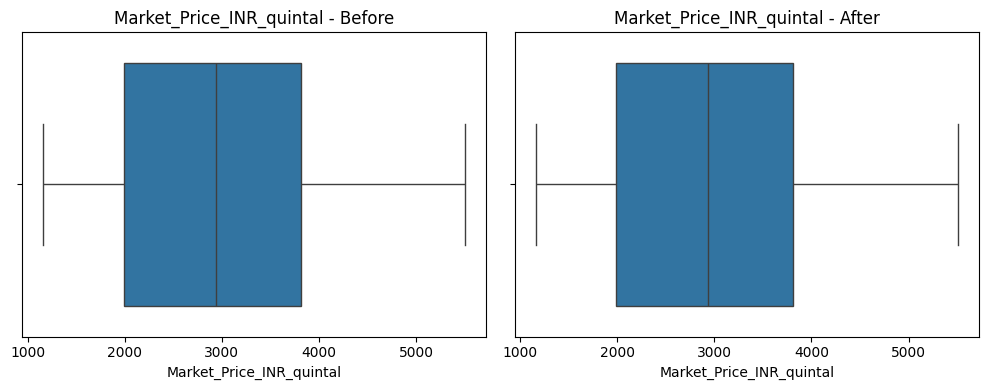

In [ ]:
#------------------------------------
# Replace Outliers with median
#------------------------------------
def detect_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - threshold * IQR
    upper = Q3 + threshold * IQR
    return (df[column] < lower) | (df[column] > upper), lower, upper

def replace_outliers_with_median(df, columns):
    df_copy = df.copy()
    for column in columns:
        outlier_mask, lower, upper = detect_outliers(df_copy, column)
        median = df_copy[column].median()
        if lower <= median <= upper:
            df_copy.loc[outlier_mask, column] = median
            print(f"{column}: {outlier_mask.sum()} outliers replaced with median = {median}")
        else:
            print(f"{column}: Median {median} is an outlier. Skipped.")
    return df_copy

def plot_boxplots(before_df, after_df, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        sns.boxplot(x=before_df[col], ax=axes[0])
        axes[0].set_title(f"{col} - Before")
        sns.boxplot(x=after_df[col], ax=axes[1])
        axes[1].set_title(f"{col} - After")
        plt.tight_layout()
        plt.show()

# Run replacement and visualize
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()
merged_df_cleaned = replace_outliers_with_median(merged_df, numerical_columns)
plot_boxplots(merged_df, merged_df_cleaned, numerical_columns)

In [ ]:
# Function to check remaining outliers
def check_remaining_outliers(df, columns, threshold=1.5):
    remaining_outliers = {}
    for column in columns:
        outlier_mask, _, _ = detect_outliers(df, column, threshold)
        remaining_outliers[column] = outlier_mask.sum()
        print(f"Remaining outliers in {column}: {remaining_outliers[column]}")
    return remaining_outliers

# Check remaining outliers after replacing them
remaining_outliers = check_remaining_outliers(merged_df_cleaned, numerical_columns)
remaining_outliers

Remaining outliers in Year: 0
Remaining outliers in Area_ha: 0
Remaining outliers in Yield_t_ha: 927
Remaining outliers in Production_t: 841
Remaining outliers in Temperature_C: 0
Remaining outliers in Rainfall_mm: 16
Remaining outliers in Humidity_percent: 0
Remaining outliers in Soil_pH: 752
Remaining outliers in Nitrogen_mg_kg: 1158
Remaining outliers in Phosphorus_mg_kg: 0
Remaining outliers in Potassium_mg_kg: 1376
Remaining outliers in Market_Price_INR_quintal: 0


{'Year': np.int64(0),
 'Area_ha': np.int64(0),
 'Yield_t_ha': np.int64(927),
 'Production_t': np.int64(841),
 'Temperature_C': np.int64(0),
 'Rainfall_mm': np.int64(16),
 'Humidity_percent': np.int64(0),
 'Soil_pH': np.int64(752),
 'Nitrogen_mg_kg': np.int64(1158),
 'Phosphorus_mg_kg': np.int64(0),
 'Potassium_mg_kg': np.int64(1376),
 'Market_Price_INR_quintal': np.int64(0)}

In [ ]:
merged_df_cleaned.head()

,State,District,Year,Month,Crop,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_Type,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Market_Price_INR_quintal
431,Andhra Pradesh,Alluri Sitharama Raju,2000,Jan,Rice,36,1.799349,110.0,30.1,686.0,79.0,Alluvial,7.4,66.0,28.0,198.0,1325.0
432,Andhra Pradesh,Alluri Sitharama Raju,2000,Jan,Sugarcane,36,1.799349,110.0,30.1,686.0,79.0,Alluvial,7.3,66.0,49.0,138.0,1325.0
429,Andhra Pradesh,Alluri Sitharama Raju,2000,Oct,Rice,81,1.799349,110.0,30.9,896.0,78.0,Alluvial,7.4,66.0,28.0,198.0,2075.0
430,Andhra Pradesh,Alluri Sitharama Raju,2000,Oct,Sugarcane,81,1.799349,110.0,30.9,896.0,78.0,Alluvial,7.3,66.0,49.0,138.0,2075.0
1275,Andhra Pradesh,Alluri Sitharama Raju,2001,Jan,Rice,59,1.799349,110.0,32.7,806.0,72.0,Alluvial,6.7,124.0,25.0,138.0,1492.0


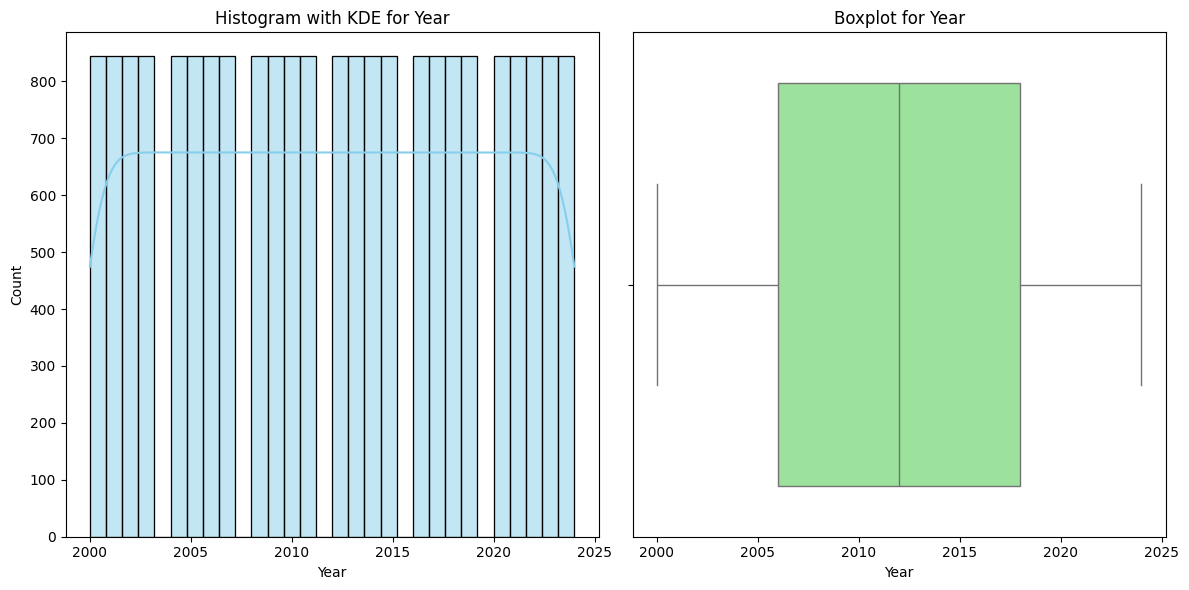

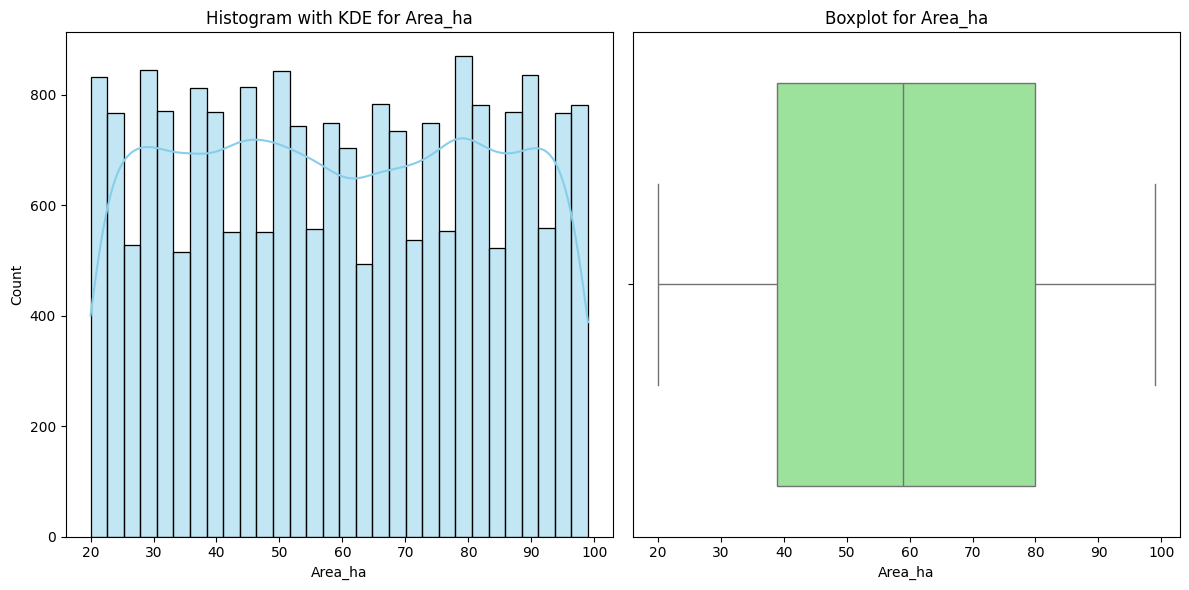

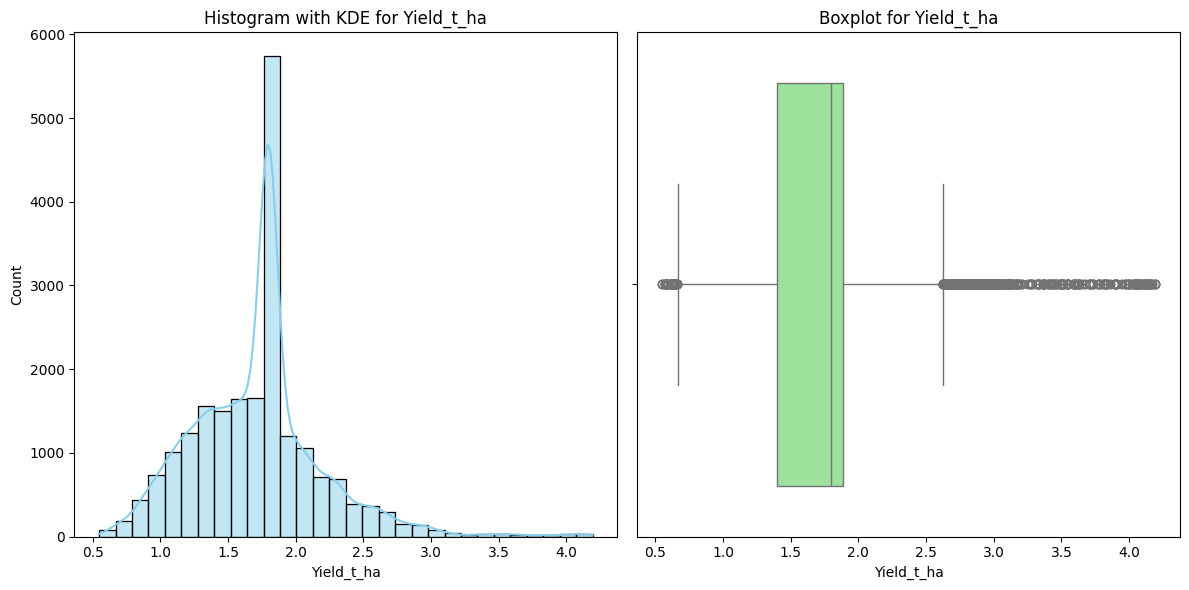

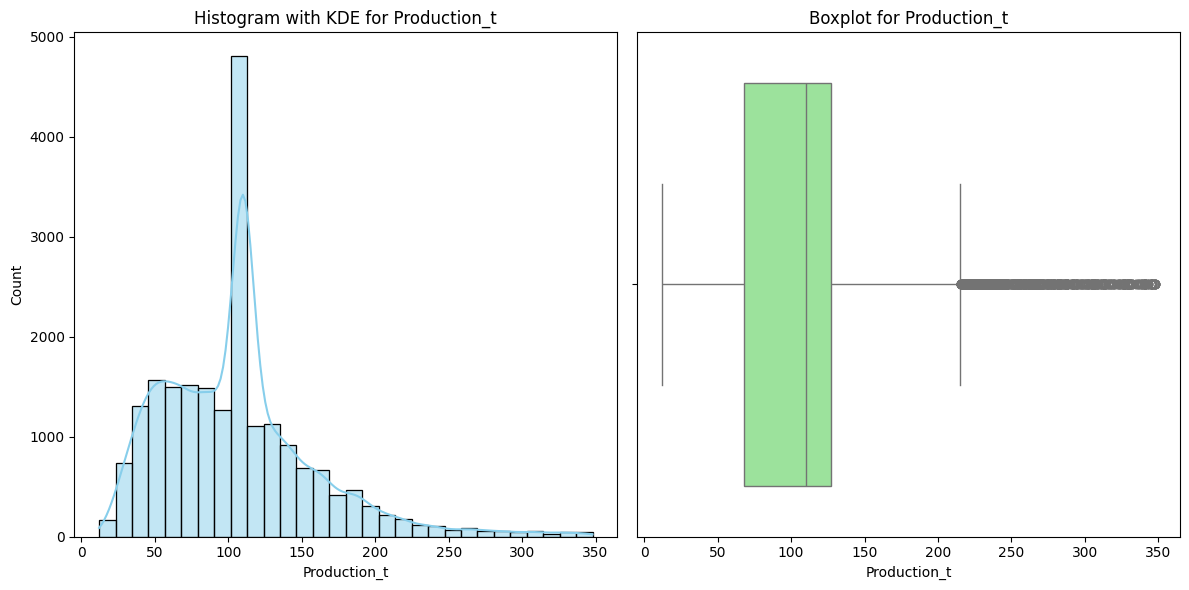

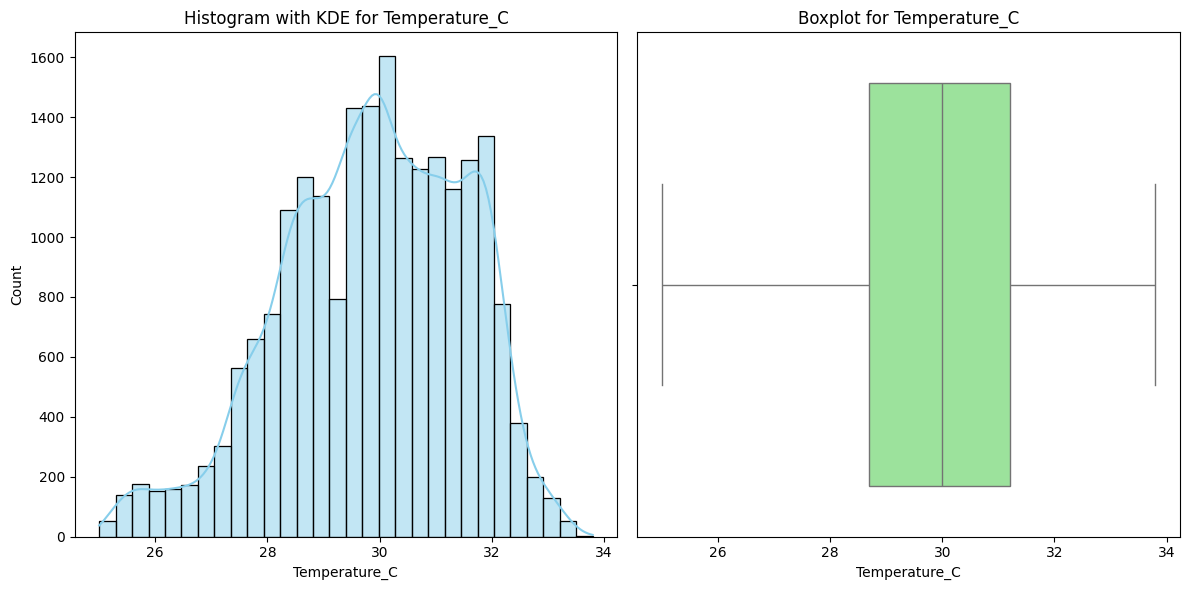

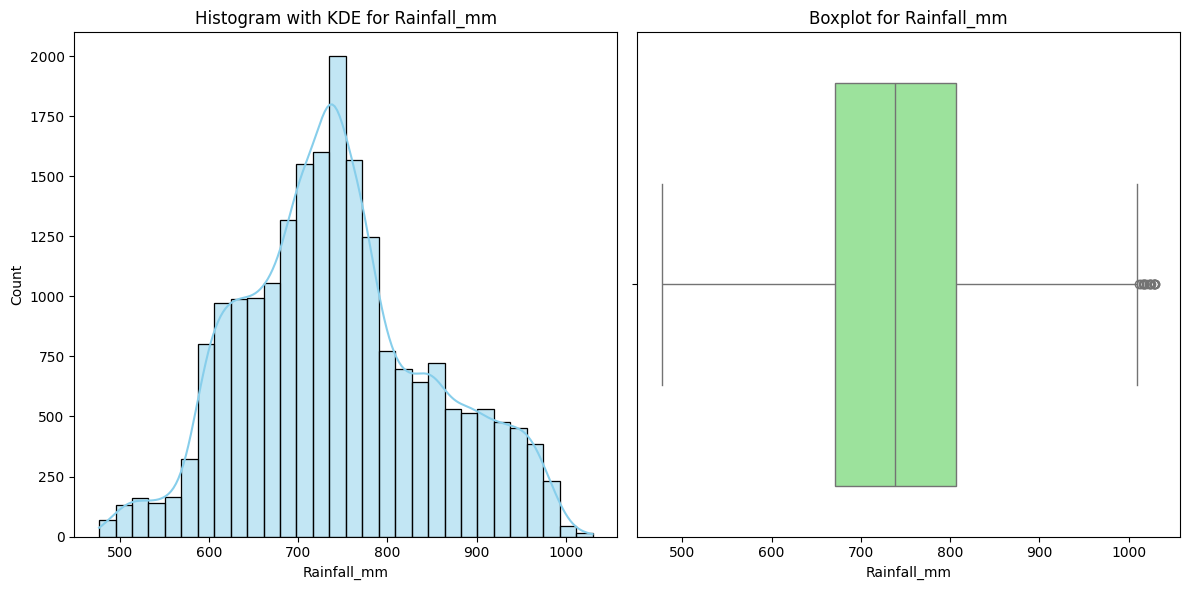

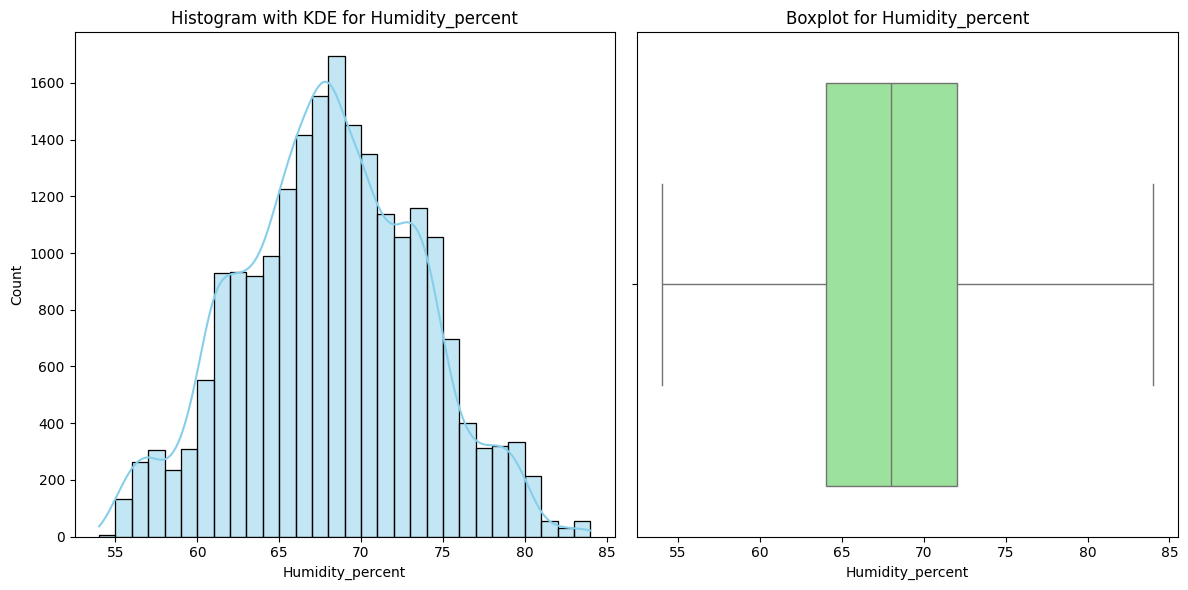

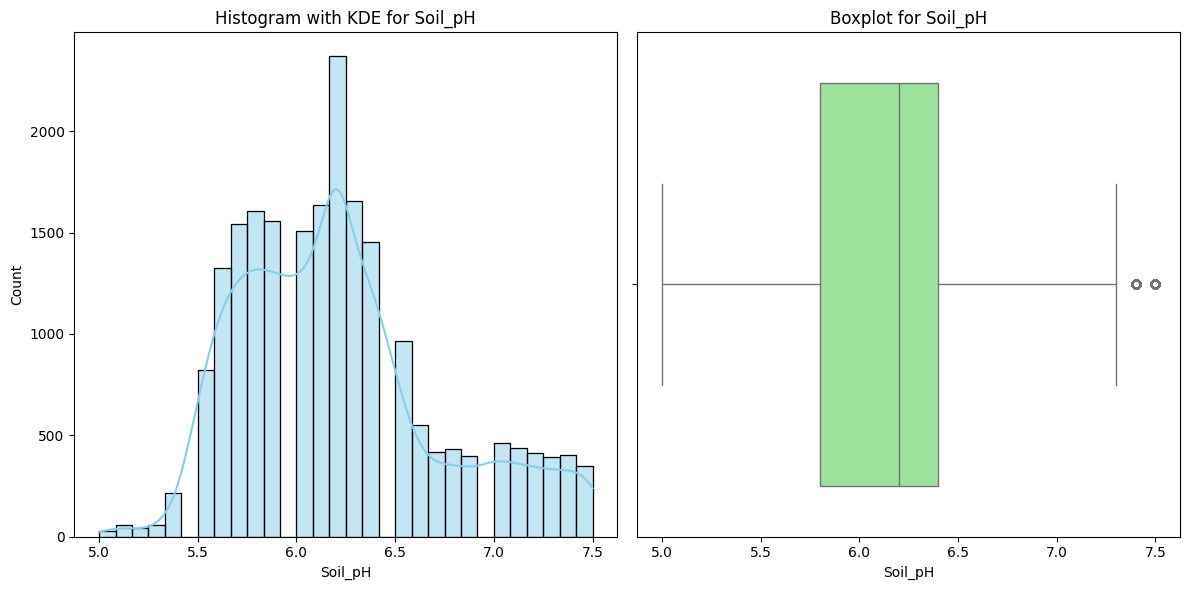

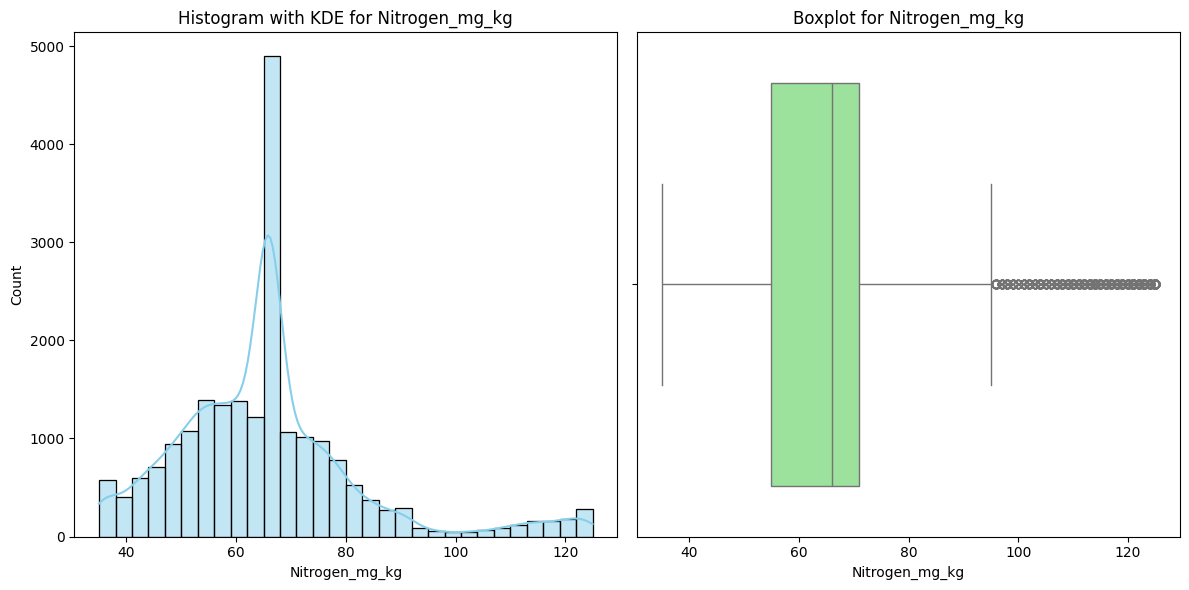

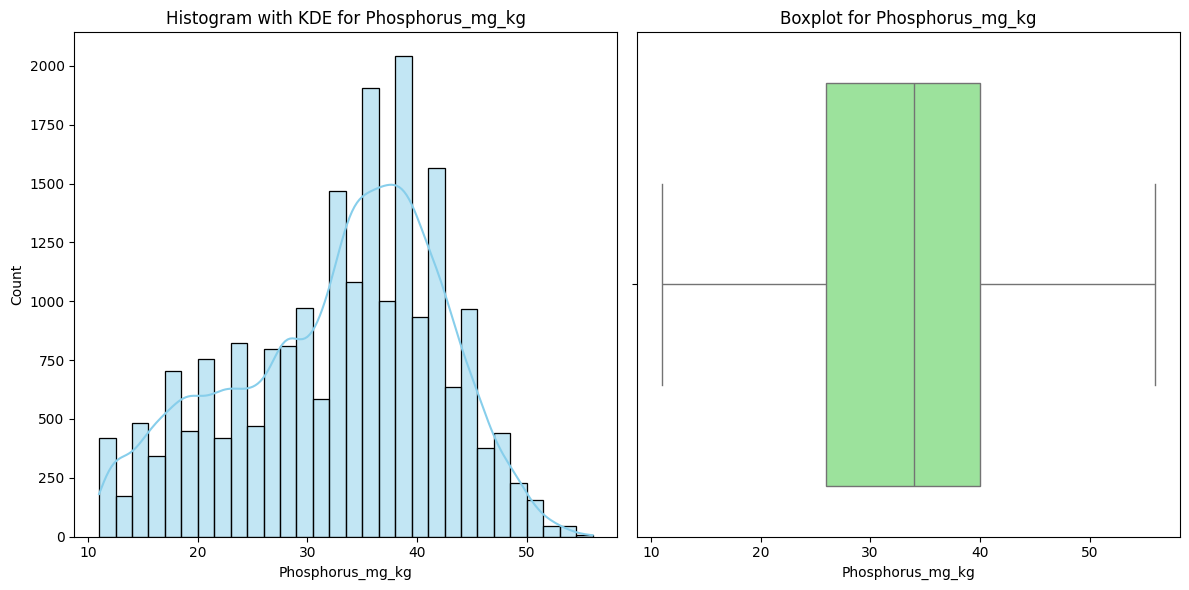

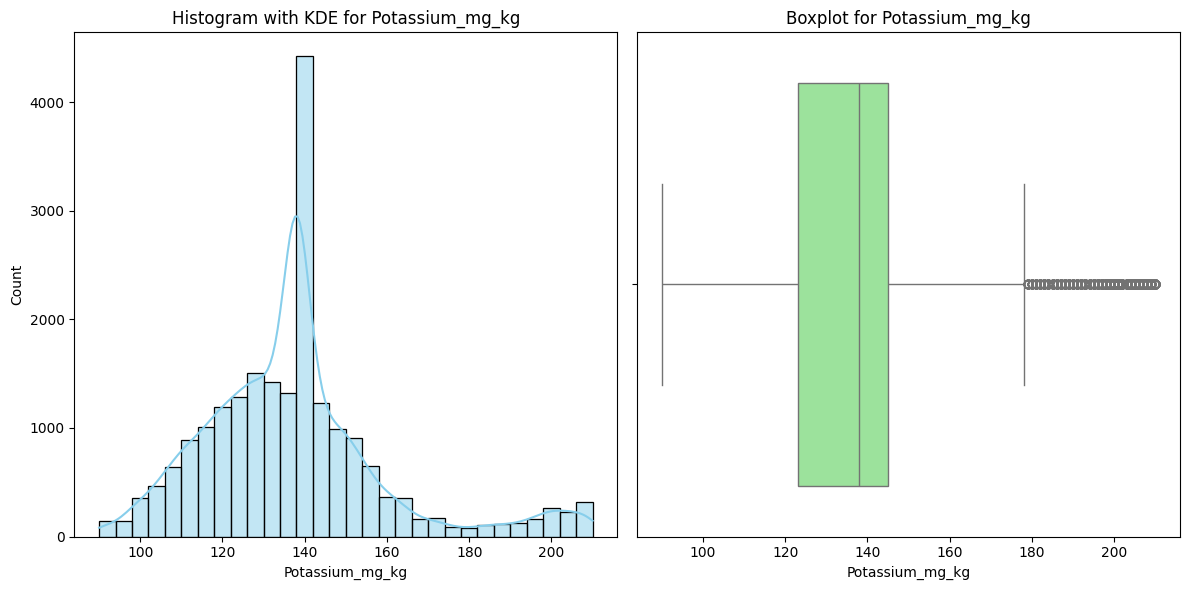

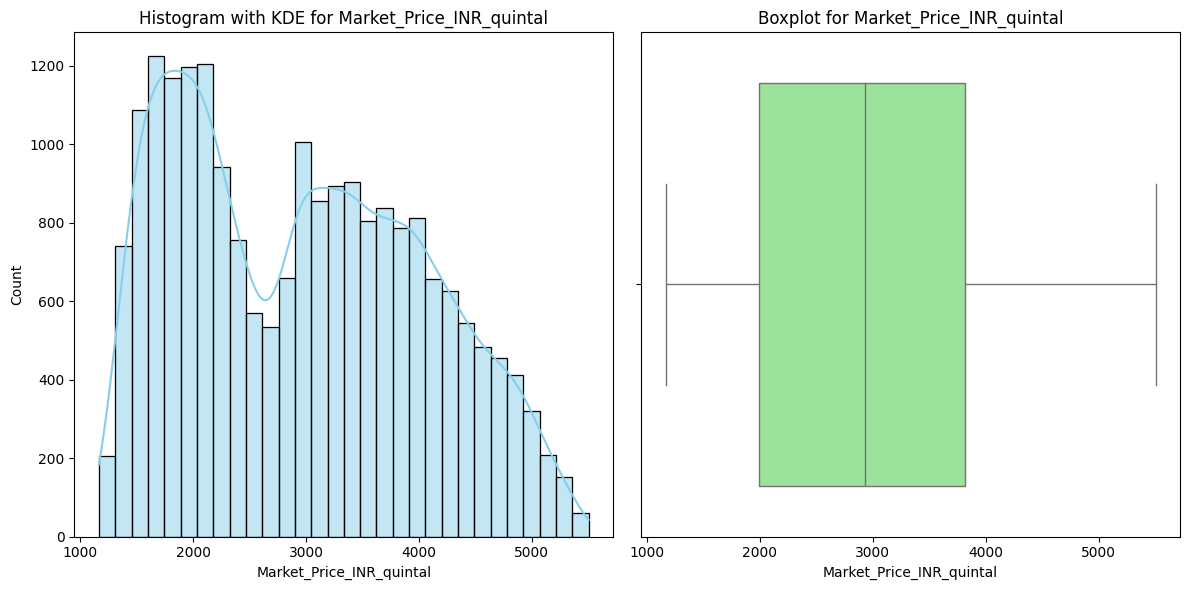

In [ ]:
#Check the skewness

# List of columns
columns = ['Year', 'Area_ha', 'Yield_t_ha', 'Production_t', 'Temperature_C', 'Rainfall_mm',
           'Humidity_percent', 'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg',
           'Potassium_mg_kg', 'Market_Price_INR_quintal']

# Loop through each column to generate histograms and boxplots
for col in columns:
    plt.figure(figsize=(12, 6))

    # Histogram and KDE
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df_cleaned[col], kde=True, color="skyblue", bins=30)
    plt.title(f'Histogram with KDE for {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df_cleaned[col], color="lightgreen")
    plt.title(f'Boxplot for {col}')

    plt.tight_layout()
    plt.show()

The skewness exists in three columns (yield, production, nitrogen). The data is right skewed. Right-skewed (positively skewed) means the tail of the distribution is stretched to the right, and most values are concentrated on the left.

If the data is right-skewed, applying a log transformation will help compress large values and bring the data closer to normal distribution.


In [ ]:
merged_df_cleaned['Yield_t_ha'] = np.log1p(merged_df_cleaned['Yield_t_ha'])  # Log(x+1) to handle zero and small values
merged_df_cleaned['Production_t'] = np.log1p(merged_df_cleaned['Production_t'])
merged_df_cleaned['Nitrogen_mg_kg'] = np.log1p(merged_df_cleaned['Nitrogen_mg_kg'])


Summary Statistics:
               Year       Area_ha    Yield_t_ha  Production_t  Temperature_C  \
count  21100.000000  21100.000000  21100.000000  21100.000000   21100.000000   
mean    2012.000000     59.398957      0.983929      4.553759      29.873602   
std        7.211273     23.216295      0.173015      0.511282       1.631860   
min     2000.000000     20.000000      0.436468      2.564949      25.000000   
25%     2006.000000     39.000000      0.874955      4.234107      28.700000   
50%     2012.000000     59.000000      1.029387      4.709530      30.000000   
75%     2018.000000     80.000000      1.060828      4.852030      31.200000   
max     2024.000000     99.000000      1.647449      5.855072      33.800000   

        Rainfall_mm  Humidity_percent       Soil_pH  Nitrogen_mg_kg  \
count  21100.000000      21100.000000  21100.000000    21100.000000   
mean     743.885877         67.985071      6.208450        4.161407   
std      105.509207          5.494799      0.

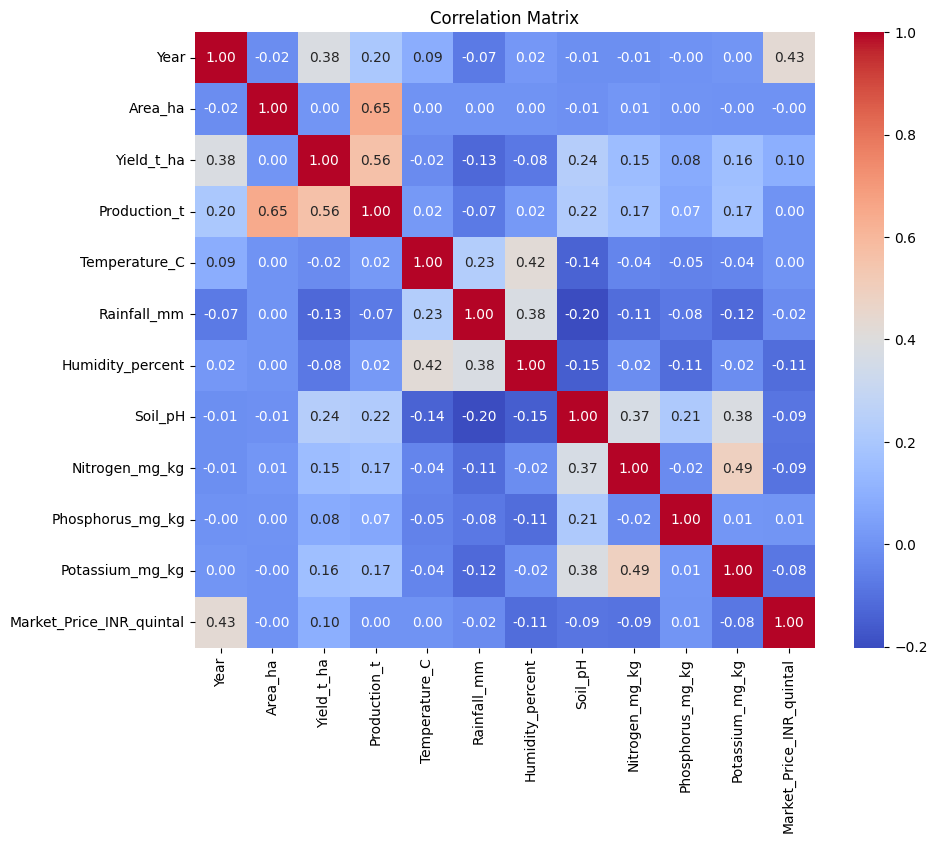

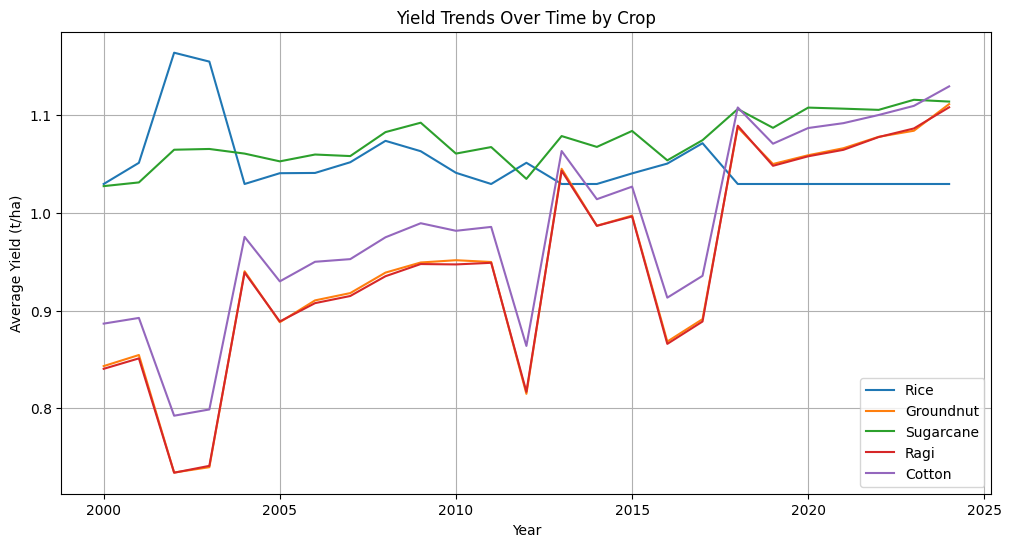

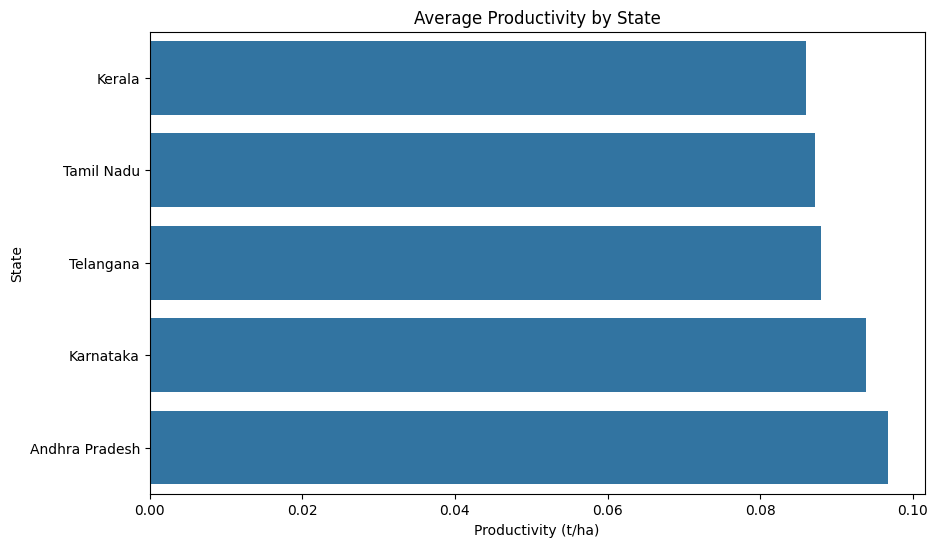

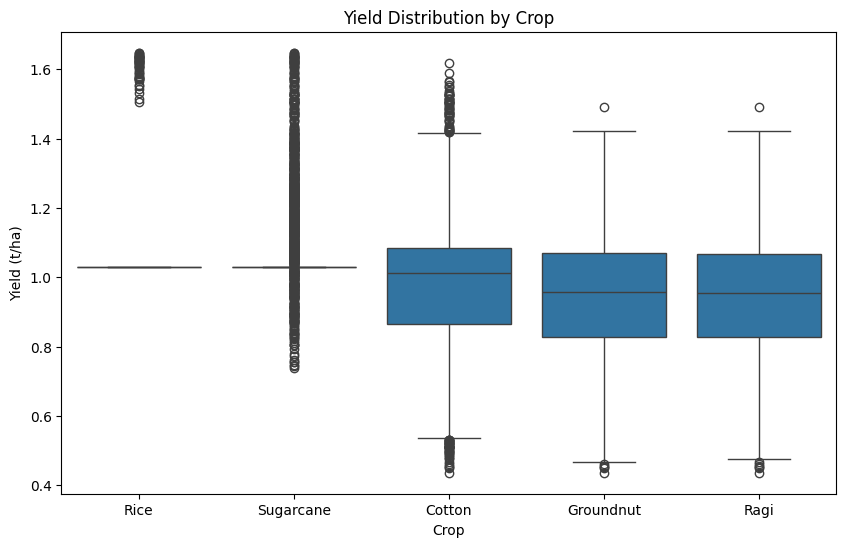

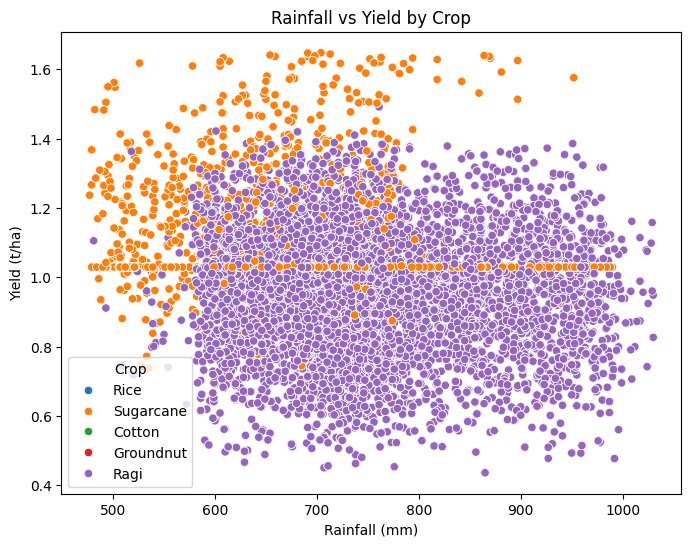


Correlation Matrix for Soil Data:
                  Nitrogen_mg_kg  Phosphorus_mg_kg  Potassium_mg_kg
Nitrogen_mg_kg          1.000000         -0.023718         0.491131
Phosphorus_mg_kg       -0.023718          1.000000         0.011091
Potassium_mg_kg         0.491131          0.011091         1.000000


In [ ]:
# -----------------------------------
# 5. Feature Engineering
# -----------------------------------
merged_df_cleaned['Productivity'] = merged_df_cleaned['Production_t'] / merged_df_cleaned['Area_ha']
cost_per_ha = 5000
merged_df_cleaned['Profitability'] = (merged_df_cleaned['Market_Price_INR_quintal'] * merged_df_cleaned['Production_t'] / 100) - (cost_per_ha * merged_df_cleaned['Area_ha'])

# -----------------------------------
# 6. Exploratory Data Analysis (EDA)
# -----------------------------------
print("\nSummary Statistics:")
print(merged_df_cleaned.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_cleaned[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 6))
for crop in crops:
    crop_data = merged_df_cleaned[merged_df_cleaned['Crop'] == crop].groupby('Year')['Yield_t_ha'].mean()
    plt.plot(crop_data.index, crop_data.values, label=crop)
plt.xlabel('Year')
plt.ylabel('Average Yield (t/ha)')
plt.title('Yield Trends Over Time by Crop')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
state_productivity = merged_df_cleaned.groupby('State')['Productivity'].mean().sort_values()
sns.barplot(x='Productivity', y=state_productivity.index, data=state_productivity.reset_index())
plt.title('Average Productivity by State')
plt.xlabel('Productivity (t/ha)')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop', y='Yield_t_ha', data=merged_df_cleaned)
plt.title('Yield Distribution by Crop')
plt.xlabel('Crop')
plt.ylabel('Yield (t/ha)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall_mm', y='Yield_t_ha', hue='Crop', data=merged_df_cleaned)
plt.title('Rainfall vs Yield by Crop')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (t/ha)')
plt.show()

print("\nCorrelation Matrix for Soil Data:")
corr_matrix = merged_df_cleaned[['Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg']].corr()
print(corr_matrix)

In [ ]:
# -----------------------------------
# 7. Save the Final Dataset
# -----------------------------------
merged_df_cleaned.to_csv("merged_data.csv", index=False)
print(f"\nFinal dataset saved: merged_data.csv with {len(merged_df_cleaned)} rows")


Final dataset saved: merged_data.csv with 21100 rows


In [ ]:
merged_df.isnull().sum()

,0
State,0
District,0
Year,0
Month,0
Crop,0
Area_ha,0
Yield_t_ha,0
Production_t,0
Temperature_C,0
Rainfall_mm,0


In [ ]:
#one hot encoding
df_encoded1 = pd.get_dummies(merged_df, columns=['State', 'District', 'Crop', 'Month', 'Soil_Type'], drop_first=True)
df_encoded1.head()

,Year,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,...,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Month_Feb,Month_Jan,Month_Nov,Month_Oct,Soil_Type_Black,Soil_Type_Laterite,Soil_Type_Red
431,2000,36,67.156477,2418.0,30.1,686.0,79.0,7.4,138.0,28.0,...,False,True,False,False,True,False,False,False,False,False
432,2000,36,67.156477,2418.0,30.1,686.0,79.0,7.3,134.0,49.0,...,False,False,True,False,True,False,False,False,False,False
429,2000,81,4.437824,359.0,30.9,896.0,78.0,7.4,138.0,28.0,...,False,True,False,False,False,False,True,False,False,False
430,2000,81,4.437824,359.0,30.9,896.0,78.0,7.3,134.0,49.0,...,False,False,True,False,False,False,True,False,False,False
1275,2001,59,69.860544,4122.0,32.7,806.0,72.0,6.7,124.0,25.0,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_encoded1.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_encoded1[numerical_columns])
df_scaled.head()

,Year,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,...,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Month_Feb,Month_Jan,Month_Nov,Month_Oct,Soil_Type_Black,Soil_Type_Laterite,Soil_Type_Red
431,-1.664101,-1.007892,1.938041,0.917940,0.138975,-0.531304,1.989421,2.022999,1.855094,-0.500562,...,False,True,False,False,True,False,False,False,False,False
432,-1.664101,-1.007892,1.938041,0.917940,0.138975,-0.531304,1.989421,1.846811,1.734006,1.736148,...,False,False,True,False,True,False,False,False,False,False
429,-1.664101,0.930448,-0.303104,-0.225525,0.629009,1.168062,1.808475,2.022999,1.855094,-0.500562,...,False,True,False,False,False,False,True,False,False,False
430,-1.664101,0.930448,-0.303104,-0.225525,0.629009,1.168062,1.808475,1.846811,1.734006,1.736148,...,False,False,True,False,False,False,True,False,False,False
1275,-1.525426,-0.017185,2.034666,1.864256,1.731586,0.439762,0.722798,0.789682,1.431286,-0.820092,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
numerical_columns

['Year',
 'Area_ha',
 'Yield_t_ha',
 'Production_t',
 'Temperature_C',
 'Rainfall_mm',
 'Humidity_percent',
 'Soil_pH',
 'Nitrogen_mg_kg',
 'Phosphorus_mg_kg',
 'Potassium_mg_kg',
 'Market_Price_INR_quintal']

In [ ]:
#what and what are correlated like yield_t_ha is correlated with production_t_ha
import pandas as pd

# Calculate the correlation matrix
matrix = merged_df.corr(numeric_only=True).abs()

# Create a list to store correlated groups
correlated_groups = []

# Set threshold for "high correlation"
threshold = 0.7

# Track visited pairs to avoid duplicates
visited = set()

# Iterate through the upper triangle of the correlation matrix
for i in range(len(matrix.columns)):
    for j in range(i + 1, len(matrix.columns)):
        col1 = matrix.columns[i]
        col2 = matrix.columns[j]
        corr_value = matrix.iloc[i, j]
        if corr_value > threshold:
            # Find if either col is already part of an existing group
            added = False
            for group in correlated_groups:
                if col1 in group or col2 in group:
                    group.update([col1, col2])
                    added = True
                    break
            if not added:
                correlated_groups.append(set([col1, col2]))

# Convert sets to sorted lists for readability
correlated_groups = [sorted(list(group)) for group in correlated_groups]

# Display results
for group in correlated_groups:
    print(group)

['Production_t', 'Yield_t_ha']
['Nitrogen_mg_kg', 'Potassium_mg_kg']


In [ ]:
# columns_to_drop = [group[0] for group in correlated_groups]

# # Step 5: Drop those columns from the dataset
# reduced_df = df_scaled.drop(columns=columns_to_drop)

# # Optional: print dropped columns
# print("Dropped columns:", columns_to_drop)

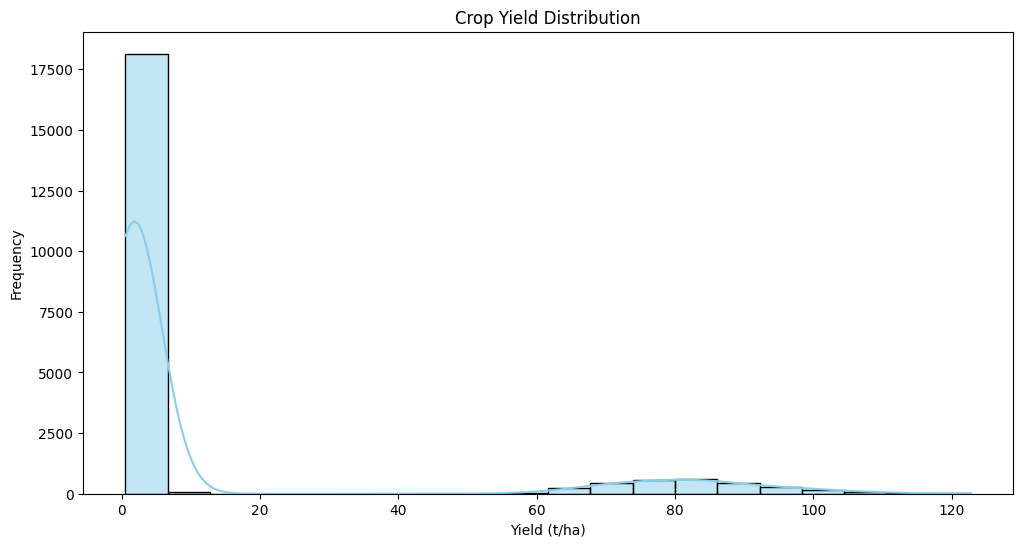

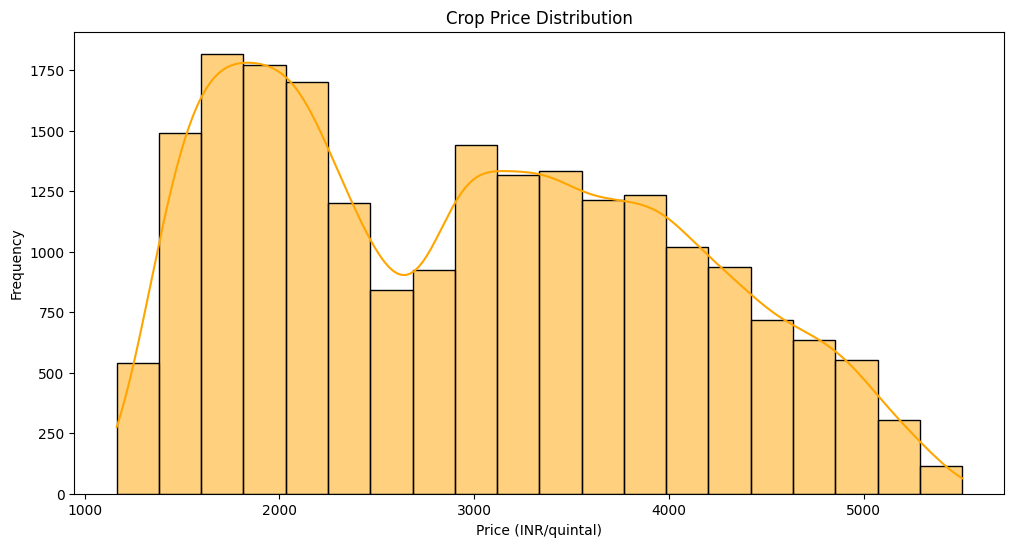

<ipython-input-82-82b8c1f6dd56>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Crop_Rice', data=df_encoded1, palette='Set2')  # Example: Visualizing Rice crop


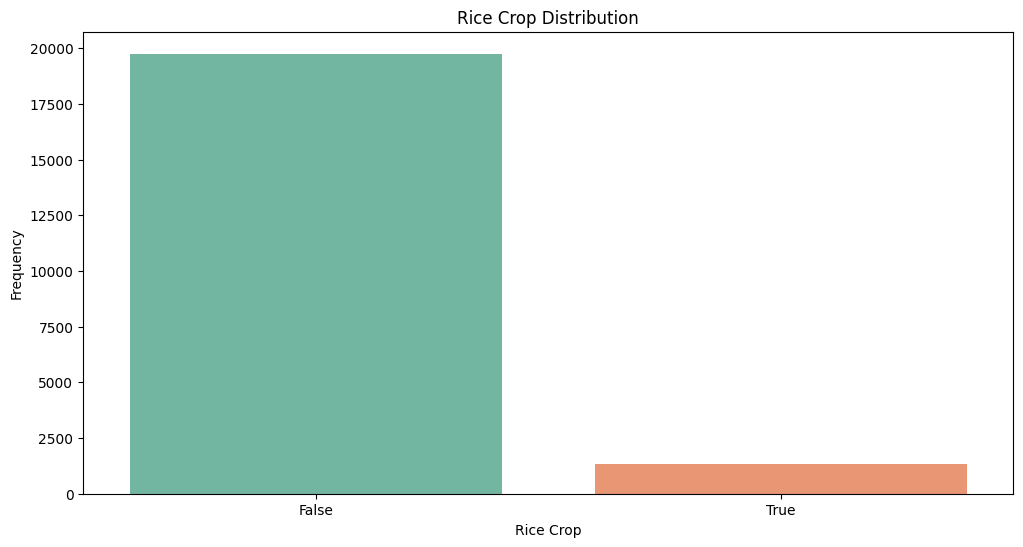

In [ ]:
# 4. Target Variable Distributions
# Crop Yield
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Yield_t_ha'], kde=True, bins=20, color='skyblue')
plt.title('Crop Yield Distribution')
plt.xlabel('Yield (t/ha)')
plt.ylabel('Frequency')
plt.show()

# Crop Price
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Market_Price_INR_quintal'], kde=True, bins=20, color='orange')
plt.title('Crop Price Distribution')
plt.xlabel('Price (INR/quintal)')
plt.ylabel('Frequency')
plt.show()

# Crop Type
# Since 'Crop' is one-hot encoded, choose one encoded column to visualize
plt.figure(figsize=(12, 6))
sns.countplot(x='Crop_Rice', data=df_encoded1, palette='Set2')  # Example: Visualizing Rice crop
plt.title('Rice Crop Distribution')  # Update title accordingly
plt.xlabel('Rice Crop')  # Update x-axis label accordingly
plt.ylabel('Frequency')
plt.show()

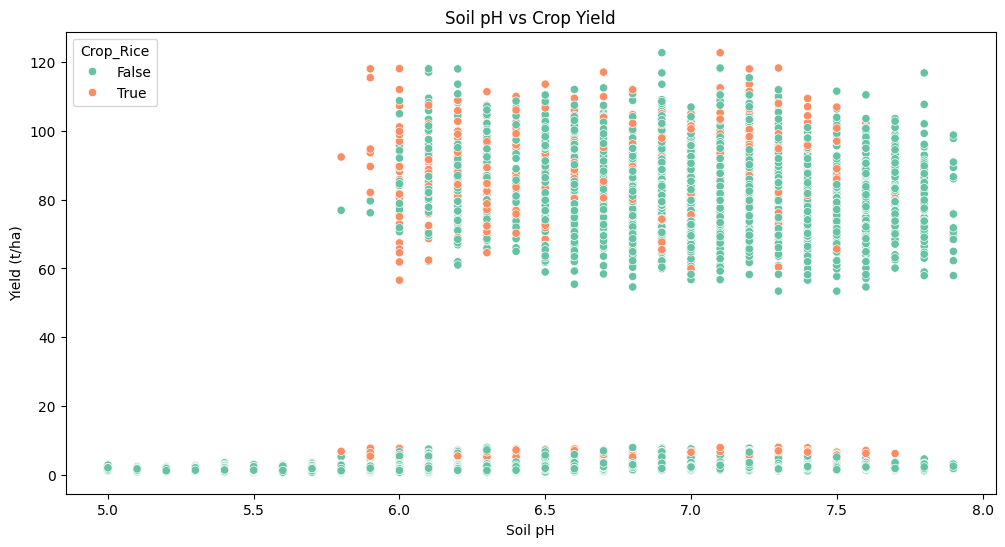

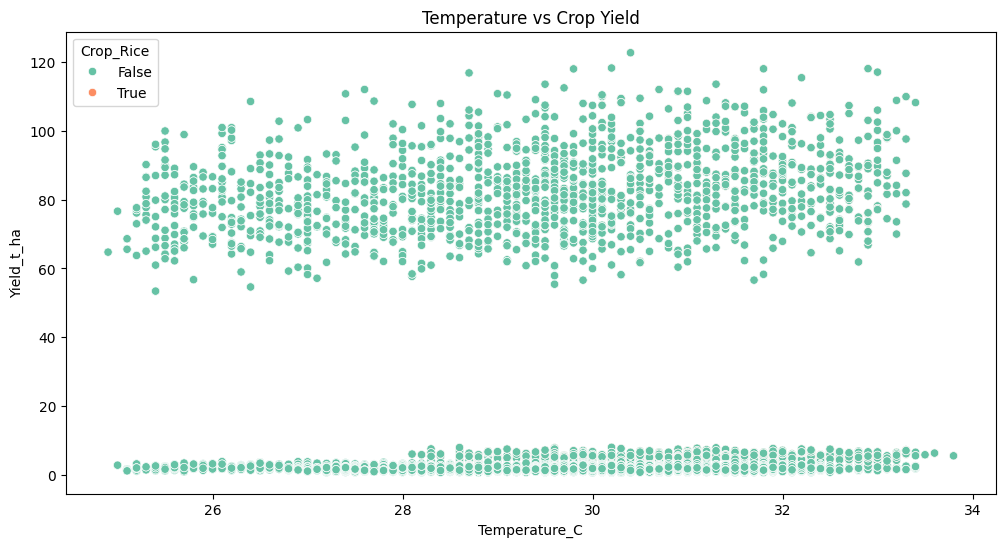

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Soil_pH', y='Yield_t_ha', hue='Crop_Rice', data=df_encoded1, palette='Set2')  # Use 'Crop_Rice' or another encoded column
plt.title('Soil pH vs Crop Yield')
plt.xlabel('Soil pH')
plt.ylabel('Yield (t/ha)')
plt.legend(title='Crop_Rice')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature_C', y='Yield_t_ha', hue='Crop_Rice', data=df_encoded1, palette='Set2')  # Use 'Crop_Rice' or another encoded column
plt.title('Temperature vs Crop Yield')
plt.show()

In [ ]:
#for how many rows crop_rice is true
df_encoded1['Crop_Rice'].value_counts()

,count
Crop_Rice,
False,19750
True,1350


In [ ]:
#give crop_rice=true 5 rows
df_encoded1[df_encoded1['Crop_Rice'] == True].head()

,Year,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,...,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Month_Feb,Month_Jan,Month_Nov,Month_Oct,Soil_Type_Black,Soil_Type_Laterite,Soil_Type_Red
431,2000,36,67.156477,2418.0,30.1,686.0,79.0,7.4,138.0,28.0,...,False,True,False,False,True,False,False,False,False,False
429,2000,81,4.437824,359.0,30.9,896.0,78.0,7.4,138.0,28.0,...,False,True,False,False,False,False,True,False,False,False
1275,2001,59,69.860544,4122.0,32.7,806.0,72.0,6.7,124.0,25.0,...,False,True,False,False,True,False,False,False,False,False
1273,2001,66,4.353844,287.0,30.9,757.0,73.0,6.7,124.0,25.0,...,False,True,False,False,False,False,True,False,False,False
2119,2002,28,67.873233,1900.0,32.0,743.0,68.0,7.0,104.0,31.0,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
#give crop = rice from df_filled 5 rows
merged_df[merged_df['Crop'] == 'Rice'].head()

,State,District,Year,Month,Crop,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_Type,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Market_Price_INR_quintal
431,Andhra Pradesh,Alluri Sitharama Raju,2000,Jan,Rice,36,67.156477,2418.0,30.1,686.0,79.0,Alluvial,7.4,138.0,28.0,198.0,1325.0
429,Andhra Pradesh,Alluri Sitharama Raju,2000,Oct,Rice,81,4.437824,359.0,30.9,896.0,78.0,Alluvial,7.4,138.0,28.0,198.0,2075.0
1275,Andhra Pradesh,Alluri Sitharama Raju,2001,Jan,Rice,59,69.860544,4122.0,32.7,806.0,72.0,Alluvial,6.7,124.0,25.0,230.0,1492.0
1273,Andhra Pradesh,Alluri Sitharama Raju,2001,Oct,Rice,66,4.353844,287.0,30.9,757.0,73.0,Alluvial,6.7,124.0,25.0,230.0,1990.0
2119,Andhra Pradesh,Alluri Sitharama Raju,2002,Jan,Rice,28,67.873233,1900.0,32.0,743.0,68.0,Alluvial,7.0,104.0,31.0,224.0,1560.0


Crop_Rice = False means that the crop there is rice (from the above 2 code cells)

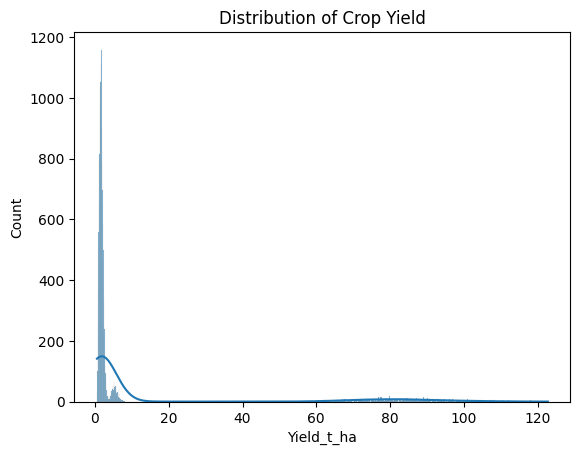

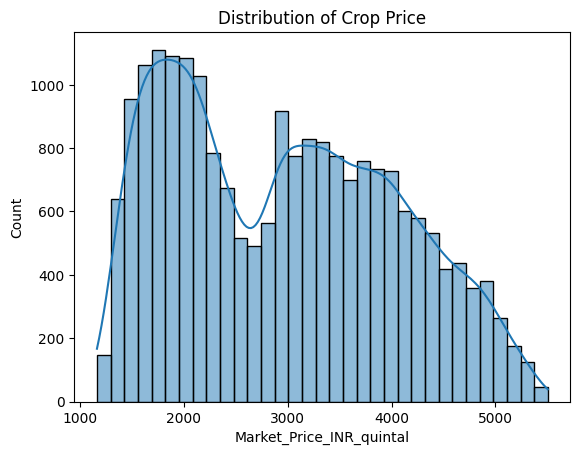

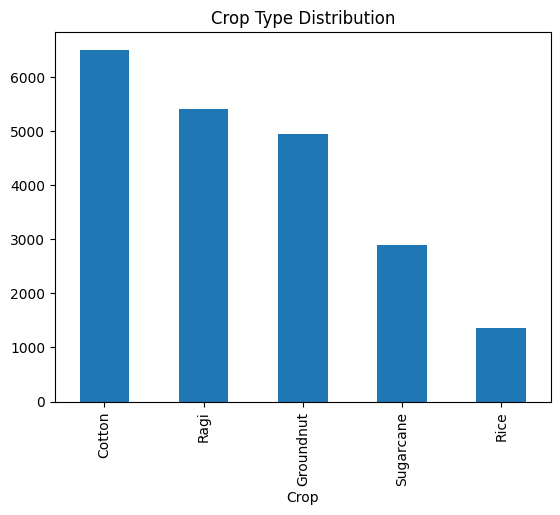

In [ ]:
sns.histplot(merged_df['Yield_t_ha'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

sns.histplot(merged_df['Market_Price_INR_quintal'], kde=True) # Changed 'crop_price' to 'Market_Price_INR_quintal'
plt.title("Distribution of Crop Price")
plt.show()

merged_df['Crop'].value_counts().plot(kind='bar')  # Changed 'crop_type' to 'Crop'
plt.title("Crop Type Distribution")
plt.show()

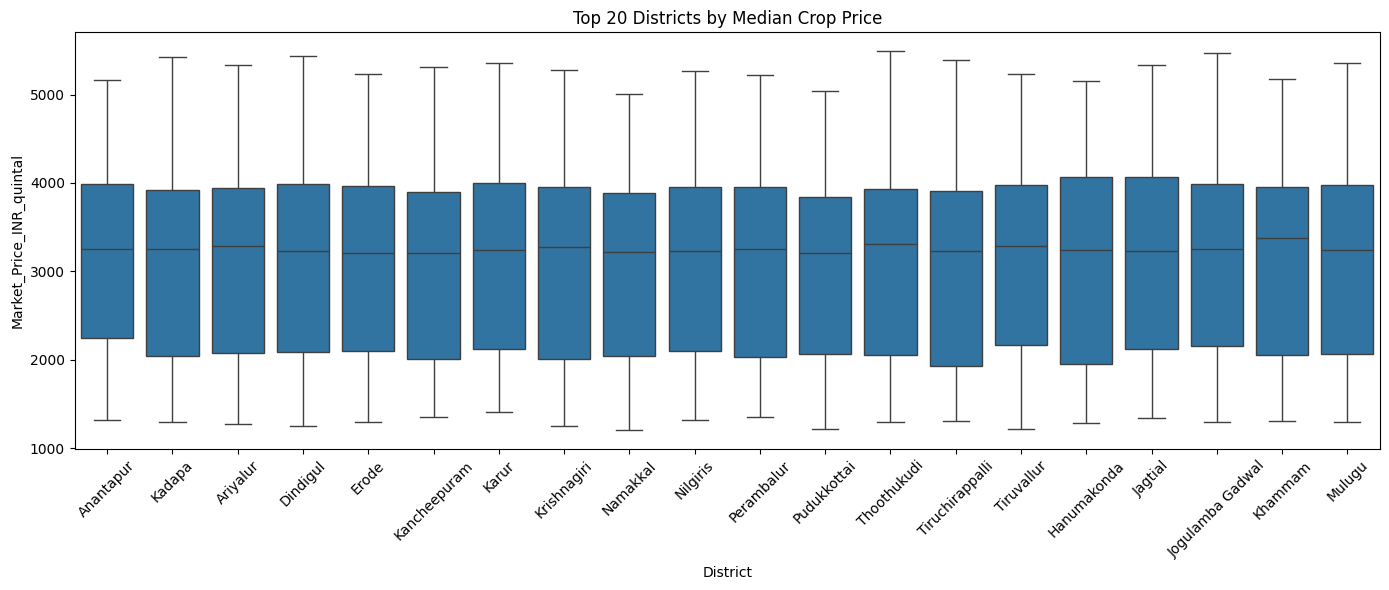

In [ ]:
top_districts = merged_df.groupby('District')['Market_Price_INR_quintal'].median().nlargest(20).index
df_top = merged_df[merged_df['District'].isin(top_districts)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='District', y='Market_Price_INR_quintal', data=df_top)
plt.title("Top 20 Districts by Median Crop Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

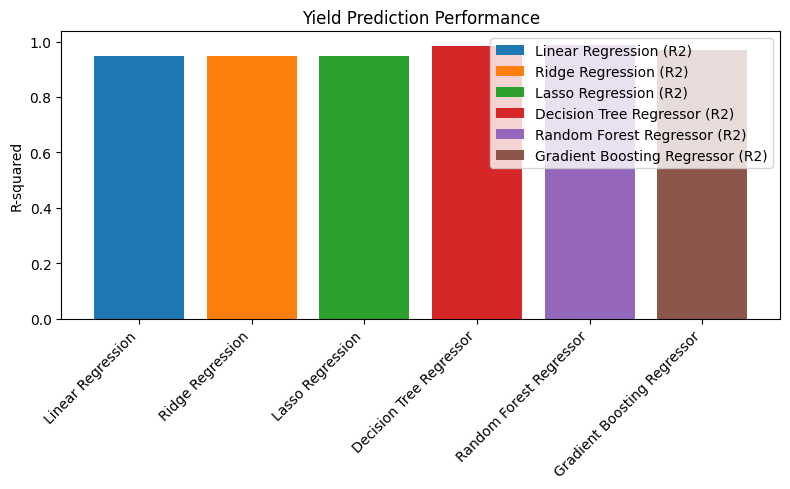

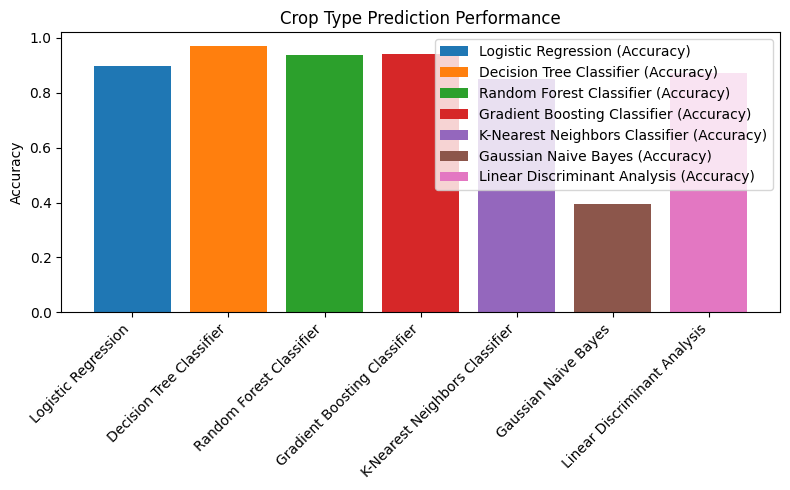

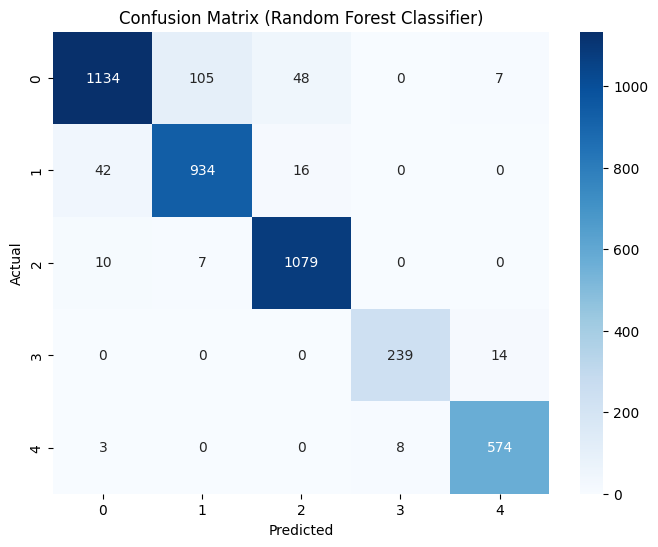

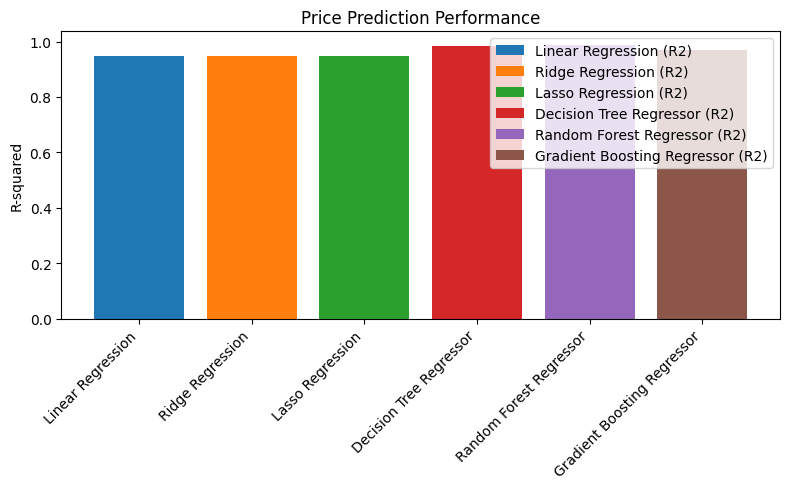

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import joblib
import os
from time import time
from sklearn.metrics import roc_auc_score
import warnings

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -----------------------------------
# Data Loading and Validation
# -----------------------------------
def load_and_validate_data(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"{file_path} not found")
    df = pd.read_csv(file_path)
    required_columns = ['Crop', 'Yield_t_ha', 'Market_Price_INR_quintal', 'Year', 'Area_ha', 'Temperature_C',
                       'Rainfall_mm', 'Humidity_percent', 'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg',
                       'Potassium_mg_kg', 'State', 'District', 'Month', 'Soil_Type']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")
    logger.info("Data loaded and validated successfully")
    return df

# Load data
df_encoded = load_and_validate_data("merged_data.csv")

# -----------------------------------
# 2. Data Preprocessing
# -----------------------------------
numerical_features = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent', 'Soil_pH',
                      'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg']
categorical_features = ['State', 'District', 'Month', 'Soil_Type']

# Impute missing values
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
df_encoded[numerical_features] = imputer_num.fit_transform(df_encoded[numerical_features])
df_encoded[categorical_features] = imputer_cat.fit_transform(df_encoded[categorical_features])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, dummy_na=False)

# Encode target variable 'Crop'
label_encoder = LabelEncoder()
df_encoded['Crop_encoded'] = label_encoder.fit_transform(df_encoded['Crop'])

# 🔒 Save label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Define features and targets
X = df_encoded.drop(['Crop', 'Yield_t_ha', 'Market_Price_INR_quintal', 'Crop_encoded', 'Productivity', 'Profitability'],
                   axis=1, errors='ignore')
y_yield = df_encoded['Yield_t_ha']
y_crop = df_encoded['Crop_encoded']
y_price = df_encoded['Market_Price_INR_quintal']

# Split data
X_train, X_test, y_yield_train, y_yield_test, y_crop_train, y_crop_test, y_price_train, y_price_test = train_test_split(
    X, y_yield, y_crop, y_price, test_size=0.2, random_state=42)

# Selective scaling using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', [col for col in X.columns if col not in numerical_features])
    ])
X_train = preprocessor.fit_transform(X_train)

# 🔒 Save preprocessor
joblib.dump(preprocessor, "preprocessor.pkl")

X_test = preprocessor.transform(X_test)

# -----------------------------------
# 3. Model Training and Evaluation
# -----------------------------------
def train_and_evaluate_regression(model, X_train, y_train, X_test, y_test, model_name='Regression Model'):
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    logger.info(f"{model_name} - Training Time: {training_time:.2f} seconds")
    logger.info(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}, MAE: {mae:.2f}")
    logger.info(f"{model_name} - CV R-squared: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    return {'model': model, 'predictions': y_pred, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae, 'CV_R2': cv_scores.mean()}

def train_and_evaluate_classification(model, X_train, y_train, X_test, y_test, model_name='Classification Model'):
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    auc_roc = None
    try:
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    except (AttributeError, ValueError):
        logger.warning(f"{model_name} - AUC-ROC not computed (proba unavailable or binary issue)")
    logger.info(f"{model_name} - Training Time: {training_time:.2f} seconds")
    logger.info(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}, AUC-ROC: {auc_roc if auc_roc else 'N/A'}")
    return {'model': model, 'predictions': y_pred, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc_roc': auc_roc}

# Regression Models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Classification Models
classification_models = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=42))]),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Store results
regression_results = {}
classification_results = {}

# Yield Prediction
logger.info("--- Yield Prediction (Regression) ---")
for name, model in regression_models.items():
    regression_results[name] = train_and_evaluate_regression(model, X_train, y_yield_train, X_test, y_yield_test, name)

# Crop Type Prediction
logger.info("\n--- Crop Type Prediction (Classification) ---")
for name, model in classification_models.items():
    classification_results[name] = train_and_evaluate_classification(model, X_train, y_crop_train, X_test, y_crop_test, name)

# Price Prediction
logger.info("\n--- Price Prediction (Regression) ---")
for name, model in regression_models.items():
    regression_results[name] = train_and_evaluate_regression(model, X_train, y_price_train, X_test, y_price_test, name)

# -----------------------------------
# 4. Results Visualization
# -----------------------------------
# Yield Prediction
plt.figure(figsize=(8, 5))
for name, result in regression_results.items():
    plt.bar(name, result['R2'], label=f"{name} (R2)")
plt.title('Yield Prediction Performance')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Crop Type Prediction
plt.figure(figsize=(8, 5))
for name, result in classification_results.items():
    plt.bar(name, result['accuracy'], label=f"{name} (Accuracy)")
plt.title('Crop Type Prediction Performance')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix for Best Classifier
best_clf = classification_results['Random Forest Classifier']['model']
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_crop_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Price Prediction
plt.figure(figsize=(8, 5))
for name, result in regression_results.items():
    plt.bar(name, result['R2'], label=f"{name} (R2)")
plt.title('Price Prediction Performance')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.6 MB/s eta 0:00:00


In [ ]:
# Finalized ML Pipeline with Best Models for Yield, Price, and Crop Type

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, accuracy_score
import optuna
import logging

logger = logging.getLogger()

# Split
data_split = train_test_split(X, y_yield, y_price, y_crop, test_size=0.2, random_state=42)
X_train, X_test, y_yield_train, y_yield_test, y_price_train, y_price_test, y_crop_train, y_crop_test = data_split

# ---------------------------- OPTUNA OBJECTIVES ----------------------------

# Random Forest for Yield

def objective_rf_yield(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 50, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42,
        'n_jobs': -1
    }
    model = RandomForestRegressor(**params)
    return cross_val_score(model, X_train, y_yield_train, cv=3, scoring='r2').mean()

# Random Forest for Price

def objective_rf_price(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 50, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42,
        'n_jobs': -1
    }
    model = RandomForestRegressor(**params)
    return cross_val_score(model, X_train, y_price_train, cv=3, scoring='r2').mean()

# Decision Tree for Crop Classification

def objective_dt_crop(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 5, 30, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'random_state': 42
    }
    model = DecisionTreeClassifier(**params)
    return cross_val_score(model, X_train, y_crop_train, cv=3, scoring='accuracy').mean()

# ---------------------------- OPTIMIZE MODELS ----------------------------

# Yield Model
study_rf_yield = optuna.create_study(direction='maximize')
study_rf_yield.optimize(objective_rf_yield, n_trials=20)
best_rf_params_yield = study_rf_yield.best_params
yield_model = RandomForestRegressor(**best_rf_params_yield, random_state=42, n_jobs=-1)
yield_model.fit(X_train, y_yield_train)
yield_pred = yield_model.predict(X_test)
yield_r2 = r2_score(y_yield_test, yield_pred)
logger.info(f"Best RF Parameters (Yield): {best_rf_params_yield}")
logger.info(f"Tuned Yield R2: {yield_r2:.2f}")

# Price Model
study_rf_price = optuna.create_study(direction='maximize')
study_rf_price.optimize(objective_rf_price, n_trials=20)
best_rf_params_price = study_rf_price.best_params
price_model = RandomForestRegressor(**best_rf_params_price, random_state=42, n_jobs=-1)
price_model.fit(X_train, y_price_train)
price_pred = price_model.predict(X_test)
price_r2 = r2_score(y_price_test, price_pred)
logger.info(f"Best RF Parameters (Price): {best_rf_params_price}")
logger.info(f"Tuned Price R2: {price_r2:.2f}")

# Crop Model
study_dt_crop = optuna.create_study(direction='maximize')
study_dt_crop.optimize(objective_dt_crop, n_trials=20)
best_dt_params = study_dt_crop.best_params
crop_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
crop_model.fit(X_train, y_crop_train)
crop_pred = crop_model.predict(X_test)
crop_accuracy = accuracy_score(y_crop_test, crop_pred)
logger.info(f"Best DT Parameters (Crop): {best_dt_params}")
logger.info(f"Tuned Crop Accuracy: {crop_accuracy:.2f}")

[I 2025-05-05 11:19:22,267] A new study created in memory with name: no-name-0656c218-6b95-4963-9c64-57f6aafde94a
[I 2025-05-05 11:19:27,746] Trial 0 finished with value: 0.748824336853616 and parameters: {'n_estimators': 53, 'max_depth': 30, 'min_samples_split': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.748824336853616.
[I 2025-05-05 11:20:08,735] Trial 1 finished with value: 0.9434364527783888 and parameters: {'n_estimators': 99, 'max_depth': 12, 'min_samples_split': 13, 'max_features': None}. Best is trial 1 with value: 0.9434364527783888.
[I 2025-05-05 11:20:14,610] Trial 2 finished with value: 0.7373924048084498 and parameters: {'n_estimators': 123, 'max_depth': 49, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.9434364527783888.
[I 2025-05-05 11:20:21,586] Trial 3 finished with value: 0.702839096565342 and parameters: {'n_estimators': 145, 'max_depth': 35, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 1 with value

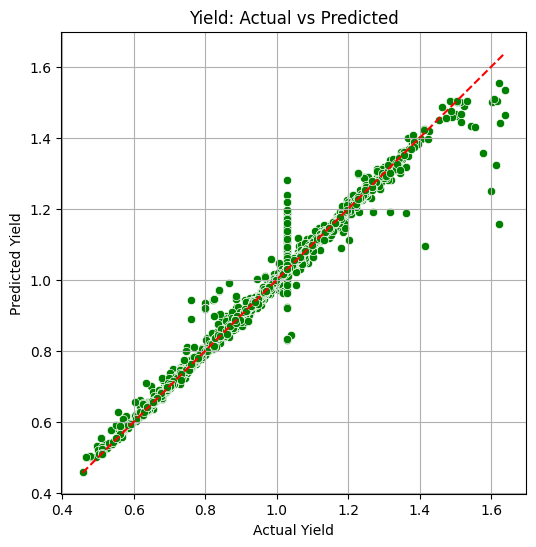

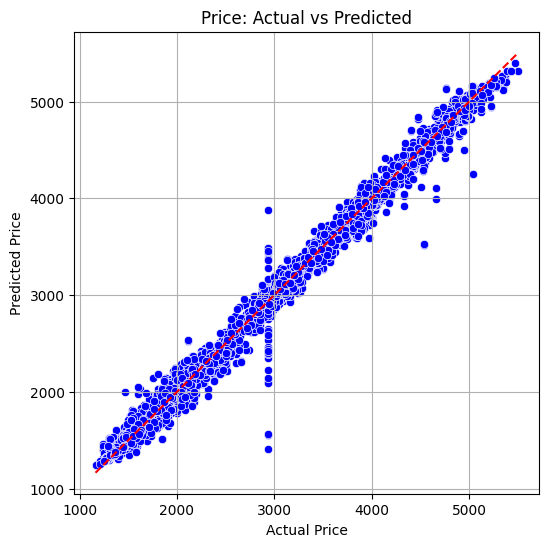

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yield: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_yield_test, y=yield_pred, color='green')
plt.plot([y_yield_test.min(), y_yield_test.max()],
         [y_yield_test.min(), y_yield_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Yield: Actual vs Predicted')
plt.grid(True)
plt.show()

# Price: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_price_test, y=price_pred, color='blue')
plt.plot([y_price_test.min(), y_price_test.max()],
         [y_price_test.min(), y_price_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price: Actual vs Predicted')
plt.grid(True)
plt.show()


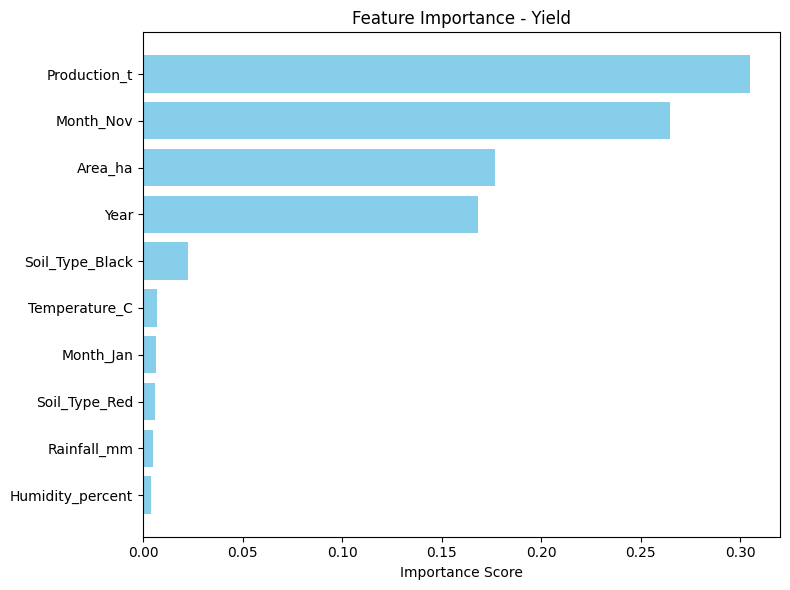

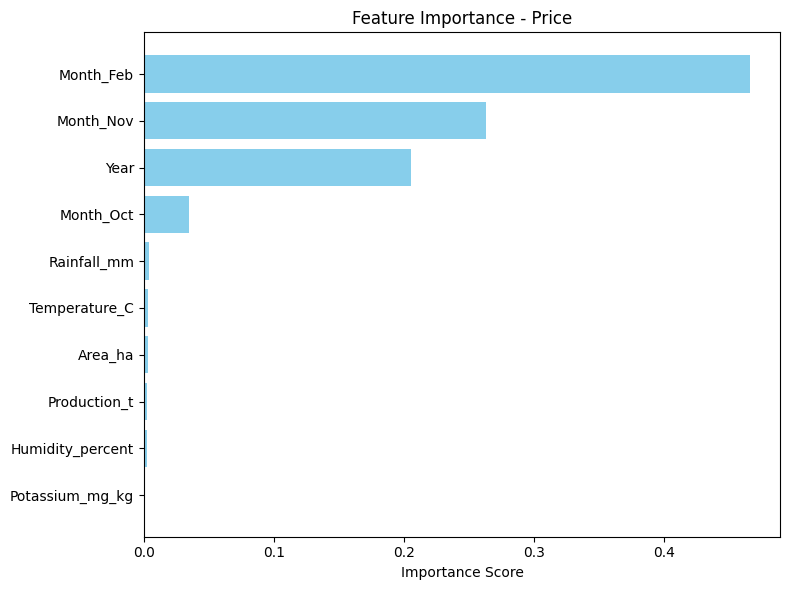

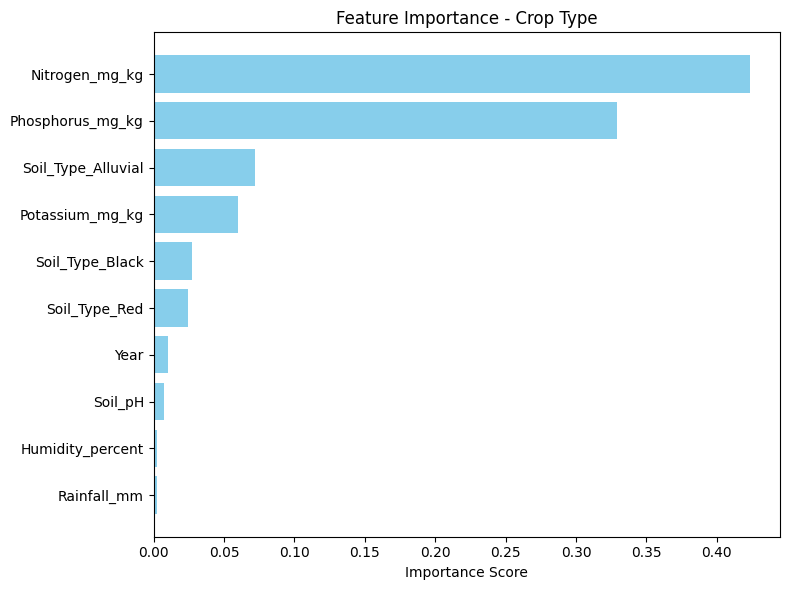

In [ ]:
def plot_feature_importance(model, feature_names, title, top_n=10):
    importances = model.feature_importances_
    indices = importances.argsort()[-top_n:]
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importances[indices], color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title(f'Feature Importance - {title}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# Feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Plot
plot_feature_importance(yield_model, feature_names, "Yield")
plot_feature_importance(price_model, feature_names, "Price")
plot_feature_importance(crop_model, feature_names, "Crop Type")


In [ ]:
# Save the Yield Model
joblib.dump(yield_model, 'yield_model.pkl')

# Save the Price Model
joblib.dump(price_model, 'price_model.pkl')

# Save the Crop Classification Model
joblib.dump(crop_model, 'crop_model.pkl')


['crop_model.pkl']